## Basic Check

In [1]:
import pandas as pd

df = pd.read_csv(
    '/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/AGAP_full_dataset_own.csv', 
)
# /media/luzhenyang/project/agent_graph_diag/results/agent_graph_subset_71_own.csv
df.shape

(2400, 17)

In [450]:
# 对齐hadm_id
ids = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/subset_ids_9.csv')
desired_order_ids = ids['hadm_id'].tolist()
if df.index.name != 'hadm_id':
    df_indexed = df.set_index('hadm_id')
else:
    df_indexed = df
    
try:
    df_reordered = df_indexed.loc[desired_order_ids]
    
    # 4. 如果您需要重置索引（将 hadm_id 变回列）
    df_reordered = df_reordered.reset_index()
    
    # 现在 df_reordered 的行顺序严格按照 ids['hadm_id'] 的顺序排列
    # 如果您想覆盖原有的 df，可以这样做：
    # df = df_reordered
    
    print("DataFrame 已根据 ids['hadm_id'] 的顺序重新排列。")
    # print(df_reordered.head()) # 打印前几行查看顺序
    
except KeyError as e:
    print(f"Error: One or more hadm_id values in ids['hadm_id'] were not found in df's index. Missing ID: {e}")
    print("Consider using .reindex() or filtering desired_order_ids to only include IDs present in df.")


DataFrame 已根据 ids['hadm_id'] 的顺序重新排列。


In [39]:
print(df['hadm_id'].iloc[78])

27654342


In [2]:
case = df[df['hadm_id'] == int(26262078)]

In [5]:
import extract_patient_info
import importlib
importlib.reload(extract_patient_info)

patient_info_path = '/media/luzhenyang/project/datasets/mimic_iv_ext_clinical_decision_abdominal/clinical_decision_making_for_abdominal_pathologies_1.1'
patient_info_file_names = [
            'history_of_present_illness.csv', 
            'microbiology.csv',
            'laboratory_tests.csv',
            'radiology_reports.csv',
        ]


patient_info = extract_patient_info.Template_customized(
    base_path=patient_info_path,
    file_names=patient_info_file_names
)

hadm_id = int(26262078)
hpi = patient_info.extract_hpi(hadm_id)
pe = patient_info.extract_pe(hadm_id)
lab = patient_info.laboratory_test_mapping_v2_llm(hadm_id)
imaging = patient_info.extract_rr(hadm_id)

In [10]:
print(imaging)

modality: Ultrasound, region: Abdomen, exam_name: US APPENDIX, text: EXAMINATION:
US APPENDIX:

TECHNIQUE:
Targeted Grey scale and color Doppler ultrasound images of the
right lower quadrant abdomen were obtained.

FINDINGS:
Targeted right lower quadrant ultrasound in the area of pain demonstrated
nonvisualization of the appendix.  No focal fluid collection.  No abnormal
lymph node enlargement or mass identified.


modality: CT, region: Abdomen, exam_name: CT ABD & PELVIS WITH CONTRAST, text: EXAMINATION:
CT abdomen pelvis with contrast.

TECHNIQUE:
MDCT axial images were acquired through the abdomen and pelvis
following intravenous contrast administration with split bolus technique.
Coronal and sagittal reformations were performed and reviewed on PACS.
Oral contrast was not administered.

DOSE:
DLP: 734.43 mGy-cm (abdomen and pelvis).
IV Contrast:  130 mL Omnipaque

FINDINGS:


LOWER CHEST:
Limited assessment of the lung bases demonstrates mild bilateral
lower lobe atelectasis.  A 0.4

In [47]:
print(case['diagnosis'].values[0])

appendicitis


In [58]:
from langchain.schema import AIMessage

eval_res = eval(case['ab_ima'].values[0])
# print(isinstance(eval_res[0], AIMessage))
print(eval_res[0].content)

[!] 0.4 cm nodule within the left lower lobe (lung base)  
[!] Appendix is fluid-filled and dilated measuring up to 10 mm  
[!] Subtle fat stranding and thickening of the lateral conal fascia  
[!] 0.5 cm appendicolith  
[!] Mucosal hyperemia of the appendix  
[!] Few top normal lymph nodes in the right lower quadrant, largest measuring 1 x 0.7 cm  
[!] Small amount of free fluid in the pelvis


In [11]:
print(case['final_review'].values[0])

<think>  
The diagnostic results for the four diseases are clear: appendicitis is established with classic clinical and imaging findings; cholecystitis, diverticulitis, and pancreatitis are all excluded based on the absence of supporting clinical, laboratory, and imaging evidence. Only one primary diagnosis—appendicitis—was formulated, with no ambiguity or overlap requiring further differential diagnosis.  
</think>  
<Summarization>  
Appendicitis is established due to classic migratory pain, RLQ tenderness with guarding, and definitive imaging findings (dilated, inflamed appendix with appendicolith and fat stranding). Cholecystitis is excluded due to lack of RUQ symptoms and gallbladder findings. Diverticulitis is excluded due to absence of LLQ pain and colonic changes. Pancreatitis is excluded due to lack of epigastric pain, enzyme elevation, and pancreatic imaging findings.  
</Summarization>  
<Final Diagnosis>: appendicitis  
<Confidence>: 95%  
<Tool Usage Statement>: no tool ca

In [497]:
from IPython.display import display, HTML

text = df[ df['hadm_id'] ==  28514071]['final_review'].values[0].replace('\\n', '\n')
display(HTML(f"<pre style='white-space: pre-wrap;'>{text}</pre>"))

In [ ]:
# ab_的信息是AIMessage，需要eval()
from langchain.schema import AIMessage

eval_res = eval(case['ab_ima'].values[0])
# print(isinstance(eval_res[0], AIMessage))
print(eval_res[0].content)

CHEST (PA & LAT) RADIOGRAPH:
[!] Lung volumes are low.
[!] Bibasilar opacities, worse on the right.

CT ABD & PELVIS WITH CONTRAST:
[!] Trace right pleural effusion with overlying atelectasis.
[!] Mild bibasilar atelectasis.
[!] Gallbladder appears distended.
[!] Mild pericholecystic fluid.
[!] Subcentimeter hypodensity in the interpolar region of the left kidney is too small to characterize.
[!] Colonic diverticulosis.
[!] Appendix is dilated to 8 mm, fluid-filled, and demonstrates a mildly hyperemic wall.
[!] Small amount of fluid in the right lower quadrant and trace on the left.
[!] Apparent diffuse urinary bladder wall thickening.
[!] Trace pelvic free fluid.
[!] Prostate calcifications.
[!] Mild atherosclerotic disease.

LIVER OR GALLBLADDER ULTRASOUND:
[!] 4.3 cm, oval, avascular heterogeneously echogenic structure near the neck of the gallbladder.
[!] Edema and thickening of the gallbladder wall up to 0.7 cm.


# 提取患者原始信息

In [127]:
import extract_patient_info
import importlib
importlib.reload(extract_patient_info)

patient_info_path = '/media/luzhenyang/project/datasets/mimic_iv_ext_clinical_decision_abdominal/clinical_decision_making_for_abdominal_pathologies_1.1'
patient_info_file_names = [
            'history_of_present_illness.csv', 
            'microbiology.csv',
            'laboratory_tests.csv',
            'radiology_reports.csv',
        ]


patient_info = extract_patient_info.Template_customized(
    base_path=patient_info_path,
    file_names=patient_info_file_names
)

In [128]:
hadm_id = int(24400153)
hpi = patient_info.extract_hpi(hadm_id)
pe = patient_info.extract_pe(hadm_id)
lab = patient_info.laboratory_test_mapping_v2_llm(hadm_id)
imaging = patient_info.extract_rr(hadm_id)

In [130]:
print(imaging)

modality: Radiograph, region: Chest, exam_name: CHEST (PA & LAT), text: TECHNIQUE:
PA and lateral views the chest.

FINDINGS:
Lung volumes are low.  There are bibasilar opacities, worse on the right. 
Superiorly, lungs are clear.  Cardiomediastinal silhouette is within normal
limits.  No acute osseous abnormalities.


modality: CT, region: Abdomen, exam_name: CT ABD & PELVIS WITH CONTRAST, text: TECHNIQUE:
Single phase split bolus contrast: MDCT axial images were acquired
through the abdomen and pelvis following intravenous contrast administration
with split bolus technique.
Oral contrast was not administered.
Coronal and sagittal reformations were performed and reviewed on PACS.

DOSE:
Acquisition sequence:
   1) Stationary Acquisition 2.5 s, 0.5 cm; CTDIvol = 12.0 mGy (Body) DLP =
6.0 mGy-cm.
   2) Spiral Acquisition 6.0 s, 47.1 cm; CTDIvol = 10.9 mGy (Body) DLP = 512.5
mGy-cm.
   3) Spiral Acquisition 0.8 s, 6.6 cm; CTDIvol = 8.2 mGy (Body) DLP = 54.3
mGy-cm.
 Total DLP (Body) = 573

In [126]:
lab = patient_info.laboratory_test_mapping(hadm_id)
print(lab)

valuestr: HOLD.  DISCARD GREATER THAN 24 HRS OLD., ref_range_lower: nan, ref_range_upper: nan -- label: Blue Top Hold, fluid: Blood, category: Chemistry, count: 274679.0
valuestr: 0.1 %, ref_range_lower: 0.0, ref_range_upper: 1.0 -- label: Basophils, fluid: Blood, category: Hematology, count: 1241587.0
valuestr: 37.0 %, ref_range_lower: 40.0, ref_range_upper: 51.0 -- label: Hematocrit, fluid: Blood, category: Hematology, count: 3325700.0
valuestr: 11.9 g/dL, ref_range_lower: 13.7, ref_range_upper: 17.5 -- label: Hemoglobin, fluid: Blood, category: Hematology, count: 3188835.0
valuestr: 12.6 %, ref_range_lower: 19.0, ref_range_upper: 53.0 -- label: Lymphocytes, fluid: Blood, category: Hematology, count: 1241592.0
valuestr: 30.5 pg, ref_range_lower: 26.0, ref_range_upper: 32.0 -- label: MCH, fluid: Blood, category: Hematology, count: 3167073.0
valuestr: 32.2 g/dL, ref_range_lower: 32.0, ref_range_upper: 37.0 -- label: MCHC, fluid: Blood, category: Hematology, count: 3167190.0
valuestr: 9

# 删除失败样本，重新跑

In [491]:
failed_samples_id = [int(28514071)]
df = df[~df['hadm_id'].isin(failed_samples_id)]
df.shape

(79, 11)

In [492]:
import shutil

shutil.copy('/media/luzhenyang/project/agent_graph_diag/results/agent_graph_subset_1_strict.csv', 
            '/media/luzhenyang/project/agent_graph_diag/results/agent_graph_subset_1_strict_backup.csv')

'/media/luzhenyang/project/agent_graph_diag/results/agent_graph_subset_1_strict_backup.csv'

In [493]:
df.to_csv('/media/luzhenyang/project/agent_graph_diag/results/agent_graph_subset_1_strict.csv', index=False)

# Eval重构AIMessage对象

In [31]:
from langchain.schema import AIMessage

eval_res = eval(inst['ab_lab'].values[0])
print(isinstance(eval_res[0], AIMessage))

True


In [32]:
eval_res[0].content

'**Abnormal Laboratory Results:**\n\n- Lymphocytes: 17.7 % (Ref: 18.0 – 42.0) [!]\n- MCH: 23.9 pg (Ref: 27.0 – 32.0) [!]\n- MCV: 76.0 fL (Ref: 82.0 – 98.0) [!]\n- Hemoglobin: 11.2 g/dL (Ref: 12.0 – 16.0) [!]\n- Neutrophils: 77.4 % (Ref: 50.0 – 70.0) [!]\n- Hematocrit: 35.6 % (Ref: 36.0 – 48.0) [!]\n\nAll other laboratory values are within normal or non-critical ranges.'

# 删除掉重复\u2003的样本，需要重新跑

In [1]:
import re
from langchain.schema import AIMessage

def is_repetitive(text, threshold=35):
    """检测文本中是否有重复连续的句段出现\\u2003， threshold为连续超过几次判定为异常"""
    text = text.encode().decode('unicode_escape')
    em_space_count = text.count('\u2003')
    if em_space_count > threshold:
        return True
    else:
        return False

def is_repet_from_tokens(text):
    s = eval(text)
    if isinstance(s, AIMessage):
        print(s.total_tokens)
        if s.total_tokens > 30000:
            return True
        else:
            return False

In [26]:
import pandas as pd
df = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own.csv')

wrong_cases_count = df['ab_ima'].apply(is_repetitive)
wrong_cases_count.value_counts()

ab_ima
False    2400
Name: count, dtype: int64

In [9]:
wrong_cases = df[ wrong_cases_count == True ]

In [10]:
wrong_cases['hadm_id']

1270    27339253
Name: hadm_id, dtype: int64

In [32]:
from IPython.display import display, HTML

text = df[ df['hadm_id'] ==  25835108]['final_review'].values[0].replace('\\n', '\n')
display(HTML(f"<pre style='white-space: pre-wrap;'>{text}</pre>"))

In [18]:
import shutil

df_cleaned = df[ wrong_cases_count == False ]

shutil.copy('/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own.csv', 
            '/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own_backup_2.csv')


df_cleaned.shape

(2399, 17)

In [19]:
df_cleaned.to_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own.csv', index=False)

## shape检查

In [21]:
check = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own.csv')
check.shape

(2400, 17)

In [22]:
check.columns

Index(['hadm_id', 'diagnosis', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima',
       'diag_app', 'diag_cho', 'diag_div', 'diag_pan', 'final_review',
       'other_process', 'input_tokens', 'output_tokens', 'total_tokens',
       'timetaken', 'tool_called'],
      dtype='object')

# 为cls组装数据集

In [50]:
df = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full/AGAP_full_dataset_own.csv')

df.shape

(2400, 17)

In [43]:
df['ab_hpi']

0       [AIMessage(content='Basic patient info:  \n- A...
1       [AIMessage(content='Basic patient info:  \n- A...
2       [AIMessage(content='Basic patient info:  \n- M...
3       [AIMessage(content='Basic patient info:  \n- A...
4       [AIMessage(content='Basic patient info:  \n- A...
                              ...                        
2395    [AIMessage(content='Basic patient info:\n- Adu...
2396    [AIMessage(content='Basic patient info:  \n- A...
2397    [AIMessage(content='Basic patient info:  \n- A...
2398    [AIMessage(content='Basic patient info:  \n- S...
2399    [AIMessage(content='Basic patient info:  \n- A...
Name: ab_hpi, Length: 2400, dtype: object

In [51]:
keep_columns = ['diagnosis', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima',]

drop_columns = ['hadm_id',
       'diag_app', 'diag_cho', 'diag_div', 'diag_pan', 'final_review',
       'other_process', 'input_tokens', 'output_tokens', 'total_tokens',
       'timetaken', 'tool_called']

df.drop(columns=drop_columns, inplace=True)
df.shape

(2400, 5)

In [52]:
df.columns

Index(['diagnosis', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima'], dtype='object')

In [ ]:
df['diagnosis'].value_counts()

diagnosis
appendicitis      957
cholecystitis     648
pancreatitis      538
diverticulitis    257
Name: count, dtype: int64

In [74]:
from langchain.schema import AIMessage

def convert_AIM(person_context):
    s = eval(person_context)
    if isinstance(s[0], AIMessage):
        return s[0].content
    else:
        print("Error while convert")

In [ ]:
s = convert_AIM(df['ab_ima'].values[0])
s

'[!] Dilated, hyperdense structure rising from the base of the cecum, measuring up to 9 mm, likely representing the appendix demonstrating mucosal hyperenhancement with respect to adjacent bowel.  \n[!] Hyperenhancement and wall thickening of the appendix.  \n[!] Inflammatory changes at the base of the cecum and adjacent to the whole wall of the appendix, particularly at the tip, which has an indistinct appearance.  \n[!] Two strikingly enlarged and briskly enhancing lymph nodes in the mesentery adjacent to the ascending colon, measuring 1.4 and 1.8 cm, the former with low-density material centrally.  \n[!] Both lymph nodes demonstrate surrounding inflammatory changes, including marked fat stranding about the node with suspected necrotic or suppurative changes.'

In [75]:
df['hpi'] = df['ab_hpi'].apply(convert_AIM)
df['hpi'].head()

0    Basic patient info:  \n- Adult female (exact a...
1    Basic patient info:  \n- Adult male (exact age...
2    Basic patient info:  \n- Male (history of pros...
3    Basic patient info:  \n- Adult male (exact age...
4    Basic patient info:  \n- Age/sex: Not specifie...
Name: hpi, dtype: object

In [76]:
df['pe'] = df['ab_pe'].apply(convert_AIM)
df['lab'] = df['ab_lab'].apply(convert_AIM)
df['ima'] = df['ab_ima'].apply(convert_AIM)

In [77]:
df.columns

Index(['diagnosis', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima', 'hpi', 'pe', 'lab',
       'ima'],
      dtype='object')

In [78]:
cols_to_concat = ['hpi', 'pe', 'lab', 'ima']

df['context'] = df[cols_to_concat].astype(str).agg('\n'.join, axis=1)

In [80]:
df['context'][0]

'Basic patient info:  \n- Adult female (exact age not specified)  \n- No significant past medical or surgical history  \n- Has an IUD in place and no longer menstruates  \n\nKey findings:  \n[!] Acute onset of right lower quadrant (RLQ) pain for 2 days  \n[!] Initial lower quadrant discomfort in the morning, significantly worsened at night, severe enough to wake her from sleep  \n[!] Anorexia (loss of appetite)  \n[!] Right-sided flank pain  \n[!] No nausea, vomiting, fever, chills, dysuria, hematuria, diarrhea, bloody stools, or recent sick contacts/exposures\nPhysical Examination:  \n[!] HR: 46 (Bradycardia)  \nOther findings: No abnormal or pathognomonic signs identified.\n■ STEP 3 - Laboratory Tests  \nAbnormal Clinical Results:\n\n- Lipase, Blood: 132.0 IU/L (Ref: 0.0–60.0)\u2003[!]\n- Ketone, Urine: TR. (Trace)\u2003[!]\n\nAll other laboratory results are within normal or non-critical ranges.\n[!] Dilated, hyperdense structure rising from the base of the cecum, measuring up to 9 

In [81]:
saved_columns = ['context', 'diagnosis']

saved_dataset = df[saved_columns]
saved_dataset.shape

(2400, 2)

In [82]:
saved_dataset.to_csv('/media/luzhenyang/project/agent_graph_diag/lm_classification/ab_cls_dataset.csv', index=False)

In [3]:
import pandas as pd

ddf = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/lm_classification/ab_cls_dataset.csv')
ddf.shape

(2400, 2)

In [4]:
label_list = sorted(ddf['diagnosis'].unique().tolist())
label_list

['appendicitis', 'cholecystitis', 'diverticulitis', 'pancreatitis']

In [5]:
ddf['diagnosis'].unique().tolist()

['appendicitis', 'cholecystitis', 'pancreatitis', 'diverticulitis']

In [6]:
ddf['diagnosis'].value_counts()

diagnosis
appendicitis      957
cholecystitis     648
pancreatitis      538
diverticulitis    257
Name: count, dtype: int64

## 对完整数据集的统计结果进行汇总分析

In [2554]:
import pandas as pd

df_full  = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/statistic_result_full_dataset.xlsx')

In [2555]:
df_full.shape

(2400, 5)

In [2556]:
df_full['diagnosis'].value_counts()

diagnosis
appendicitis      957
cholecystitis     648
pancreatitis      538
diverticulitis    257
Name: count, dtype: int64

In [2557]:
df_full_by_diagnosis = df_full.groupby('diagnosis')

In [2558]:
df_full_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    对              947
                空                5
                错                5
cholecystitis   对              583
                错               37
                空               28
diverticulitis  对              238
                错               12
                空                7
pancreatitis    对              485
                空               27
                错               26
Name: count, dtype: int64

In [2573]:
df_full_app = df_full[ df['diagnosis'] == 'appendicitis' ]

acc_app = 947/len(df_full_app['hadm_id'].unique())

In [2586]:
round(acc_app, 3)

0.99

In [2585]:
df_full_cho = df_full[ df['diagnosis'] == 'cholecystitis' ]

acc_cho = 583/len(df_full_cho['hadm_id'].unique())

round(acc_cho, 3)

0.9

In [2582]:
df_full_div = df_full[ df['diagnosis'] == 'diverticulitis' ]

acc_div = 238/len(df_full_div['hadm_id'].unique())

round(acc_div, 3)

0.926

In [2587]:
df_full_pan = df_full[ df['diagnosis'] == 'pancreatitis' ]

acc_pan = 485/len(df_full_pan['hadm_id'].unique())

round(acc_pan, 3)

0.901

## 统计完整数据集的用时，tokens，工具调用情况

### 用时

In [2591]:
round(df['timetaken'].mean(), 3)

np.float64(17.31)

In [2592]:
round(df['timetaken'].median(), 3)

np.float64(16.3)

In [2593]:
round(df['timetaken'].std(), 3)

np.float64(7.446)

#### 按级别分组查看用时

In [2596]:
df = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/AGAP_full_dataset_own.csv')

grouped_by_diagnosis = df.groupby('diagnosis')

In [2599]:
round(grouped_by_diagnosis['timetaken'].mean(), 2)

diagnosis
appendicitis      16.70
cholecystitis     17.23
diverticulitis    16.66
pancreatitis      18.80
Name: timetaken, dtype: float64

In [2600]:
round(grouped_by_diagnosis['timetaken'].median(), 2)

diagnosis
appendicitis      15.28
cholecystitis     16.38
diverticulitis    16.06
pancreatitis      17.81
Name: timetaken, dtype: float64

In [2601]:
round(grouped_by_diagnosis['timetaken'].std(), 2)

diagnosis
appendicitis      10.32
cholecystitis      4.54
diverticulitis     3.90
pancreatitis       4.79
Name: timetaken, dtype: float64

## Inputs Tokens

In [2604]:
round(df['input_tokens'].mean(), 2)

np.float64(11722.99)

In [2605]:
round(df['input_tokens'].median(), 2)

np.float64(10746.0)

In [2606]:
round(df['input_tokens'].std(), 2)

np.float64(4718.59)

### 按级别分组查看tokens

In [2608]:
round(grouped_by_diagnosis['input_tokens'].mean(), 2)

diagnosis
appendicitis      10117.10
cholecystitis     12093.11
diverticulitis    12792.51
pancreatitis      13622.86
Name: input_tokens, dtype: float64

In [2609]:
round(grouped_by_diagnosis['input_tokens'].median(), 2)

diagnosis
appendicitis       9468.0
cholecystitis     11167.5
diverticulitis    11584.0
pancreatitis      12712.5
Name: input_tokens, dtype: float64

In [2610]:
round(grouped_by_diagnosis['input_tokens'].std(), 2)

diagnosis
appendicitis      5533.24
cholecystitis     3281.15
diverticulitis    4240.84
pancreatitis      3806.80
Name: input_tokens, dtype: float64

## Output Tokens

In [2611]:
round(df['output_tokens'].mean(), 2)

np.float64(3242.94)

In [2612]:
round(df['output_tokens'].median(), 2)

np.float64(3091.5)

In [2613]:
round(df['output_tokens'].std(), 2)

np.float64(1063.5)

In [2614]:
round(grouped_by_diagnosis['output_tokens'].mean(), 2)

diagnosis
appendicitis      2746.15
cholecystitis     3469.23
diverticulitis    3416.47
pancreatitis      3771.18
Name: output_tokens, dtype: float64

In [2615]:
round(grouped_by_diagnosis['output_tokens'].median(), 2)

diagnosis
appendicitis      2611.0
cholecystitis     3323.5
diverticulitis    3185.0
pancreatitis      3651.5
Name: output_tokens, dtype: float64

In [2616]:
round(grouped_by_diagnosis['output_tokens'].std(), 2)

diagnosis
appendicitis      1248.83
cholecystitis      721.01
diverticulitis     862.73
pancreatitis       706.77
Name: output_tokens, dtype: float64

## Total_Tokens

In [2617]:
round(df['total_tokens'].mean(), 2)

np.float64(14965.93)

In [2618]:
round(df['total_tokens'].median(), 2)

np.float64(13851.0)

In [2619]:
round(df['total_tokens'].std(), 2)

np.float64(5747.17)

In [2620]:
round(grouped_by_diagnosis['total_tokens'].mean(), 2)

diagnosis
appendicitis      12863.26
cholecystitis     15562.33
diverticulitis    16208.98
pancreatitis      17394.05
Name: total_tokens, dtype: float64

In [2621]:
round(grouped_by_diagnosis['total_tokens'].median(), 2)

diagnosis
appendicitis      12060.0
cholecystitis     14518.5
diverticulitis    14820.0
pancreatitis      16350.0
Name: total_tokens, dtype: float64

In [2622]:
round(grouped_by_diagnosis['total_tokens'].std(), 2)

diagnosis
appendicitis      6769.11
cholecystitis     3958.12
diverticulitis    5060.53
pancreatitis      4466.19
Name: total_tokens, dtype: float64

## 工具调用情况

In [2626]:
round(grouped_by_diagnosis['tool_called'].value_counts(), 4)

diagnosis       tool_called
appendicitis    False          951
                True             6
cholecystitis   False          635
                True            13
diverticulitis  False          251
                True             6
pancreatitis    False          524
                True            14
Name: count, dtype: int64

### 工具调用与准确率的关系

In [2693]:
df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/statistic_result_full_dataset.xlsx')

df_tool_called = df[ df['tool_called'] == True ]

In [2695]:
df_tool_called.drop(columns='Unnamed: 0', inplace=True)

/tmp/ipykernel_109280/3295012707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tool_called.drop(columns='Unnamed: 0', inplace=True)


In [2696]:
df_tool_called_by_diagnosis = df_tool_called.groupby('diagnosis')

In [2697]:
df_tool_called_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    对               4
                错               2
cholecystitis   对               9
                错               4
diverticulitis  对               5
                错               1
pancreatitis    对              14
Name: count, dtype: int64

## 从2400例中分层抽样

In [1]:
import pandas as pd

df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/statistic_result_full_dataset.xlsx')
df.drop(columns=['Unnamed: 0'], inplace=True)
# 抽取正确/错误两类每种级别各10例，先抽取id，然后构建
df_true = df[ df['correctness'] == '对' ]

In [2]:
df.columns

Index(['hadm_id', 'diagnosis', 'tool_called', 'correctness'], dtype='object')

In [5]:
df_true['diagnosis'].value_counts()

diagnosis
appendicitis      947
cholecystitis     583
pancreatitis      485
diverticulitis    238
Name: count, dtype: int64

In [3]:
true_group_samples_id = df_true.groupby('diagnosis').apply(
    lambda x: x.sample(n=10, random_state=42) if len(x) >= 10 else x
).reset_index(drop=True)

/tmp/ipykernel_74690/1715470699.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  true_group_samples_id = df_true.groupby('diagnosis').apply(


In [2758]:
true_group_samples_id.to_csv('/media/luzhenyang/project/agent_graph_diag/stratification_samples/true_samples_id.csv', index=False)

In [2759]:
true_group_samples_id['diagnosis'].value_counts()

diagnosis
appendicitis      10
cholecystitis     10
diverticulitis    10
pancreatitis      10
Name: count, dtype: int64

In [6]:
## 错/空的样本
df_false = df[(df['correctness'] == '错') | (df['correctness'] == '空')]
df_false['correctness'].value_counts()

correctness
错    80
空    67
Name: count, dtype: int64

In [7]:
df_false['diagnosis'].value_counts()

diagnosis
cholecystitis     65
pancreatitis      53
diverticulitis    19
appendicitis      10
Name: count, dtype: int64

In [2762]:
false_group_samples_id = df_false.groupby('diagnosis').apply(
    lambda x: x.sample(n=10, random_state=42) if len(x) >= 10 else x
).reset_index(drop=True)
false_group_samples_id.to_csv('/media/luzhenyang/project/agent_graph_diag/stratification_samples/false_samples_id.csv', index=False)

/tmp/ipykernel_109280/2705356011.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  false_group_samples_id = df_false.groupby('diagnosis').apply(


In [2763]:
false_group_samples_id['diagnosis'].value_counts()

diagnosis
appendicitis      10
cholecystitis     10
diverticulitis    10
pancreatitis      10
Name: count, dtype: int64

In [ ]:
## 拼接
combined_df = pd.concat([true_group_samples_id, false_group_samples_id], axis=0, ignore_index=True)
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df.to_csv("/media/luzhenyang/project/agent_graph_diag/stratification_samples/stratification_samples_TF.csv", index=False)

In [2765]:
shuffled_df['tool_called'].value_counts()

tool_called
False    77
True      3
Name: count, dtype: int64

### 对其他基模型的结果进行统计分析

In [13]:
gpt_stats_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/statistic_result_full_dataset.xlsx')
gemini_stats_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', sheet_name='Gemini-2.5-Pro')
llama_stats_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', sheet_name='llama3.3-70B-ins')

In [9]:
gpt_stats_df.columns

Index(['Unnamed: 0', 'hadm_id', 'diagnosis', 'tool_called', 'correctness'], dtype='object')

In [12]:
gemini_stats_df['correctness'].head()

0    对
1    对
2    对
3    对
4    对
Name: correctness, dtype: object

In [14]:
# 将“对”转换为1，“错”和空转换为0
def convert_correctness(df):
    df['correctness'] = df['correctness'].map({'对': 1, '错': 0, '空': 0})
    return df

# 应用转换函数
gpt_stats_df = convert_correctness(gpt_stats_df)
gemini_stats_df = convert_correctness(gemini_stats_df)
llama_stats_df = convert_correctness(llama_stats_df)

# 对齐数据框，基于hadm_id列
merged_df = pd.merge(gpt_stats_df[['hadm_id', 'correctness']], gemini_stats_df[['hadm_id', 'correctness']], on='hadm_id', suffixes=('_gpt', '_gemini'))
merged_df = pd.merge(merged_df, llama_stats_df[['hadm_id', 'correctness']], on='hadm_id')
merged_df.rename(columns={'correctness': 'correctness_llama'}, inplace=True)

# 查看数据对齐后的结果
print(merged_df.head())

    hadm_id  correctness_gpt  correctness_gemini  correctness_llama
0  27562444                1                   1                  1
1  21750372                0                   0                  0
2  20414022                1                   1                  1
3  22738192                1                   1                  1
4  28835469                1                   1                  1


In [17]:
merged_df.shape

(80, 4)

In [22]:
# 将分层的id区分开来
true_ids = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/stratification_samples/true_samples_id.csv')
true_ids.columns

Index(['hadm_id', 'diagnosis', 'tool_called', 'correctness'], dtype='object')

In [ ]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar

# 对于两个模型，进行McNemar检验
def mcnemar_test(df, model1, model2):
    # 计算2x2列联表
    table = pd.crosstab(df[model1], df[model2])
    # 执行McNemar检验
    result = mcnemar(table, exact=True)  # exact=True使用精确检验方法
    print(f"McNemar Test between {model1} and {model2}: statistic={result.statistic:.3f}, p-value={result.pvalue:.3f}")
    return result.pvalue

# 运行McNemar检验
def perform_mcnemar_tests(df):
    p_value_gpt_gemini = mcnemar_test(df, 'correctness_gpt', 'correctness_gemini')
    p_value_gemini_llama = mcnemar_test(df, 'correctness_gemini', 'correctness_llama')
    p_value_llama_gpt = mcnemar_test(df, 'correctness_llama', 'correctness_gpt')

# 执行检验
perform_mcnemar_tests(merged_df[])

McNemar Test between correctness_gpt and correctness_gemini: statistic=0.000, p-value=0.000
McNemar Test between correctness_gemini and correctness_llama: statistic=7.000, p-value=0.629
McNemar Test between correctness_llama and correctness_gpt: statistic=2.000, p-value=0.000


In [18]:
gpt_stats_df = gpt_stats_df[gpt_stats_df['hadm_id'].isin(gemini_stats_df['hadm_id'].values)].copy()

In [19]:
from sklearn.metrics import cohen_kappa_score

# 假设correctness列为0或1的二分类数据
kappa_gpt_gemini = cohen_kappa_score(gpt_stats_df['correctness'], gemini_stats_df['correctness'])
kappa_gemini_llama = cohen_kappa_score(gemini_stats_df['correctness'], llama_stats_df['correctness'])
kappa_llama_gpt = cohen_kappa_score(llama_stats_df['correctness'], gpt_stats_df['correctness'])

print("Cohen's Kappa between GPT and Gemini: ", kappa_gpt_gemini)
print("Cohen's Kappa between Gemini and Llama: ", kappa_gemini_llama)
print("Cohen's Kappa between Llama and GPT: ", kappa_llama_gpt)

Cohen's Kappa between GPT and Gemini:  0.050000000000000044
Cohen's Kappa between Gemini and Llama:  0.4035087719298246
Cohen's Kappa between Llama and GPT:  0.025000000000000022


In [20]:
from scipy.stats import wilcoxon

# 假设correctness列为0或1的二分类数据
stat_gpt_gemini, p_gpt_gemini = wilcoxon(gpt_stats_df['correctness'], gemini_stats_df['correctness'])
stat_gemini_llama, p_gemini_llama = wilcoxon(gemini_stats_df['correctness'], llama_stats_df['correctness'])
stat_llama_gpt, p_llama_gpt = wilcoxon(llama_stats_df['correctness'], gpt_stats_df['correctness'])

print(f"Wilcoxon Test between GPT and Gemini: statistic={stat_gpt_gemini}, p-value={p_gpt_gemini}")
print(f"Wilcoxon Test between Gemini and Llama: statistic={stat_gemini_llama}, p-value={p_gemini_llama}")
print(f"Wilcoxon Test between Llama and GPT: statistic={stat_llama_gpt}, p-value={p_llama_gpt}")


Wilcoxon Test between GPT and Gemini: statistic=175.5, p-value=0.0011768659106247378
Wilcoxon Test between Gemini and Llama: statistic=63.0, p-value=0.46685427082272546
Wilcoxon Test between Llama and GPT: statistic=160.0, p-value=0.0002305526207958935


In [36]:
gpt_correct_df = gpt_stats_df[~gpt_stats_df['hadm_id'].isin(true_ids['hadm_id'].values)]
gemini_correct_df = gemini_stats_df[~gemini_stats_df['hadm_id'].isin(true_ids['hadm_id'].values)]
llama_correct_df = llama_stats_df[~llama_stats_df['hadm_id'].isin(true_ids['hadm_id'].values)]

In [37]:
gpt_correct_df.shape

(40, 5)

In [41]:
import pandas as pd
from statsmodels.stats.contingency_tables import mcnemar

# 假设你已有转换后的 DataFrame：gpt_correct_df, gemini_correct_df, llama_correct_df
# 这3个df均包含：'hadm_id', 'diagnosis', 'correctness'列，correctness已经是0/1

diseases = ['cholecystitis', 'pancreatitis', 'diverticulitis', 'appendicitis']

results = {
    'disease': [],
    'mcnemar_statistic_gpt_gemini': [],
    'mcnemar_pvalue_gpt_gemini': [],
    'mcnemar_statistic_gemini_llama': [],
    'mcnemar_pvalue_gemini_llama': [],
    'mcnemar_statistic_llama_gpt': [],
    'mcnemar_pvalue_llama_gpt': []
}

for disease in diseases:
    # 筛选当前疾病的数据
    disease_gpt = gpt_correct_df[gpt_correct_df['diagnosis'] == disease]
    disease_gemini = gemini_correct_df[gemini_correct_df['diagnosis'] == disease]
    disease_llama = llama_correct_df[llama_correct_df['diagnosis'] == disease]

    # 合并三个模型结果，只保留三者都有的样本（inner join）
    combined_df = pd.merge(disease_gpt[['hadm_id', 'correctness']], 
                           disease_gemini[['hadm_id', 'correctness']], 
                           on='hadm_id', suffixes=('_gpt', '_gemini'))
    combined_df = pd.merge(combined_df, 
                           disease_llama[['hadm_id', 'correctness']], 
                           on='hadm_id')
    combined_df.rename(columns={'correctness': 'correctness_llama'}, inplace=True)

    print(combined_df['correctness_gemini'].value_counts())
    print(combined_df['correctness_gpt'].value_counts())

    # 计算三组列联表
    contingency_gpt_gemini = pd.crosstab(combined_df['correctness_gpt'], combined_df['correctness_gemini'])
    contingency_gemini_llama = pd.crosstab(combined_df['correctness_gemini'], combined_df['correctness_llama'])
    contingency_llama_gpt = pd.crosstab(combined_df['correctness_llama'], combined_df['correctness_gpt'])

    # 定义函数做McNemar检验，只对2x2表做检验，其他情况返回None
    def safe_mcnemar(table):
        if table.shape == (2, 2):
            test_result = mcnemar(table)
            return test_result.statistic, test_result.pvalue
        else:
            return None, None

    # 计算统计量和p值
    stat_gpt_gemini, pval_gpt_gemini = safe_mcnemar(contingency_gpt_gemini)
    stat_gemini_llama, pval_gemini_llama = safe_mcnemar(contingency_gemini_llama)
    stat_llama_gpt, pval_llama_gpt = safe_mcnemar(contingency_llama_gpt)

    # 保存结果
    results['disease'].append(disease)
    results['mcnemar_statistic_gpt_gemini'].append(stat_gpt_gemini)
    results['mcnemar_pvalue_gpt_gemini'].append(pval_gpt_gemini)
    results['mcnemar_statistic_gemini_llama'].append(stat_gemini_llama)
    results['mcnemar_pvalue_gemini_llama'].append(pval_gemini_llama)
    results['mcnemar_statistic_llama_gpt'].append(stat_llama_gpt)
    results['mcnemar_pvalue_llama_gpt'].append(pval_llama_gpt)

# 转换为DataFrame查看结果
result_df = pd.DataFrame(results)
print(result_df)

# 保存到Excel，修改路径为你本地路径
result_df.to_excel('/media/luzhenyang/project/agent_graph_diag/statistical_test_results_mcnemar.xlsx', index=False)


correctness_gemini
1    7
0    3
Name: count, dtype: int64
correctness_gpt
0    10
Name: count, dtype: int64
correctness_gemini
0    7
1    3
Name: count, dtype: int64
correctness_gpt
0    10
Name: count, dtype: int64
correctness_gemini
1    6
0    4
Name: count, dtype: int64
correctness_gpt
0    10
Name: count, dtype: int64
correctness_gemini
0    6
1    4
Name: count, dtype: int64
correctness_gpt
0    10
Name: count, dtype: int64
          disease mcnemar_statistic_gpt_gemini mcnemar_pvalue_gpt_gemini  \
0   cholecystitis                         None                      None   
1    pancreatitis                         None                      None   
2  diverticulitis                         None                      None   
3    appendicitis                         None                      None   

   mcnemar_statistic_gemini_llama  mcnemar_pvalue_gemini_llama  \
0                             2.0                      1.00000   
1                             1.0                  

In [4]:
drop_cols = [
    'diagnosis', 'other_process', 'input_tokens', 'output_tokens', 'total_tokens', 'timetaken', 'tool_called'
]

gpt_samples_content.drop(columns=drop_cols, inplace=True)
gemini_samples_content.drop(columns=drop_cols, inplace=True)
llama_samples_content.drop(columns=drop_cols, inplace=True)
print(llama_samples_content.columns)

Index(['hadm_id', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima', 'diag_app',
       'diag_cho', 'diag_div', 'diag_pan', 'final_review'],
      dtype='object')


In [5]:
gpt_samples_content = gpt_samples_content[ gpt_samples_content['hadm_id'].isin(gemini_samples_content['hadm_id'].values) ].copy()
gpt_samples_content.shape

(80, 10)

In [6]:
from langchain.schema import AIMessage

def process_aimessage_columns(df: pd.DataFrame, columns):
    """
    处理数据框中包含 AIMessages 的列，提取其中的 `content`。
    
    参数:
    - df: 包含 AIMessages 的数据框
    - columns: 需要处理的列名列表
    
    返回:
    - 处理后的数据框
    """
    for col in columns:
        df[col] = df[col].apply(lambda x: eval(x)[0].content if isinstance(x, str) else x)
    return df

# 假设你的数据框是 llama_samples_content, gemini_samples_content, gpt_samples_content
# 定义需要处理的列名
aimessage_columns = ['ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima']

# 对每个数据集进行处理
gpt_samples_content = process_aimessage_columns(gpt_samples_content, aimessage_columns)
gemini_samples_content = process_aimessage_columns(gemini_samples_content, aimessage_columns)
llama_samples_content = process_aimessage_columns(llama_samples_content, aimessage_columns)

# 检查处理后的数据
print(gpt_samples_content[['hadm_id'] + aimessage_columns].head())


      hadm_id                                             ab_hpi  \
39   27562444  Basic patient info:  \n- Age and sex not speci...   
85   21750372  Basic patient info:  \n- Adult female (exact a...   
87   20414022  Basic patient info:  \n- Age, sex: Not specifi...   
97   22738192  Basic patient info:  \n- Age: [not specified] ...   
140  28835469  Basic patient info:  \n- Sex: Male  \n- Age: N...   

                                                 ab_pe  \
39   Abnormal Clinical Information and Pathognomoni...   
85   Physical Examination:  \n[!] Tachycardic  \n[!...   
87   Physical Examination:\n\n- Vital signs: [!] He...   
97   Physical Examination:  \n[!] Uncomfortable  \n...   
140  Abnormal Clinical Information and Pathognomoni...   

                                                ab_lab  \
39   ■ STEP 3 - Laboratory Tests  \n**Abnormal Clin...   
85   **Abnormal Laboratory Results:**\n\n- Glucose,...   
87   **Abnormal Clinical Results from Laboratory Te...   
97   **Abn

In [8]:
import torch
from transformers import AutoTokenizer, AutoModel
from bert_score import score

# 选择模型和tokenizer（你可以选择其他模型）
model_name = "yikuan8/Clinical-BigBird"  # 或者 "google/bigbird-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# 示例文本（生成文本和参考文本）
generated_texts = [
    "The patient presents with acute abdominal pain and a high fever."
]
reference_texts = [
    "The patient exhibits symptoms of abdominal pain along with a fever."
]

# Step 1: 计算文本嵌入
def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    # 获取 [CLS] 向量作为文本嵌入
    embeddings = outputs.last_hidden_state[:, 0, :]
    return embeddings

generated_embeddings = get_embeddings(generated_texts)
reference_embeddings = get_embeddings(reference_texts)

# Step 2: 计算 BERTScore
P, R, F1 = score(generated_texts, reference_texts, lang="en", model_type=model_name)

# 打印嵌入和BERTScore结果
print("Generated Text Embedding:", generated_embeddings)
print("Reference Text Embedding:", reference_embeddings)
print("Precision:", P.mean().item())
print("Recall:", R.mean().item())
print("F1 Score:", F1.mean().item())


ValueError: Due to a serious vulnerability issue in `torch.load`, even with `weights_only=True`, we now require users to upgrade torch to at least v2.6 in order to use the function. This version restriction does not apply when loading files with safetensors.
See the vulnerability report here https://nvd.nist.gov/vuln/detail/CVE-2025-32434

In [9]:
import torch
from transformers import BigBirdTokenizer, BigBirdForMaskedLM
from bert_score import score
from transformers import AutoModel, AutoTokenizer

# 使用clinical-bigbird的预训练模型
model_name = "yikuan8/Clinical-BigBird"  # 你可以替换为 "google/bigbird-roberta-base"

# # 加载tokenizer和模型
# tokenizer = BigBirdTokenizer.from_pretrained(model_name)
# model = BigBirdForMaskedLM.from_pretrained(model_name)
# model_name = 'bert-base-uncased'

tokenizer = BigBirdTokenizer.from_pretrained(model_name)
model = BigBirdForMaskedLM.from_pretrained(model_name)


# 假设每个数据集的格式相同（gpt_samples_content, gemini_samples_content, llama_samples_content）
datasets = [gpt_samples_content, gemini_samples_content, llama_samples_content]

# 要计算的步骤列
steps_columns = [
    'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima', 'diag_app', 
    'diag_cho', 'diag_div', 'diag_pan', 'final_review'
]

# 用于存储计算的 BERTScore
results = {step: {'P': [], 'R': [], 'F1': []} for step in steps_columns}

# 按照 `hadm_id` 对齐数据集
for step in steps_columns:
    # 确保所有数据集根据 hadm_id 排列，进行逐一匹配
    gpt_sorted = gpt_samples_content[['hadm_id', step]].sort_values(by='hadm_id')
    gemini_sorted = gemini_samples_content[['hadm_id', step]].sort_values(by='hadm_id')
    llama_sorted = llama_samples_content[['hadm_id', step]].sort_values(by='hadm_id')
    
    # 对齐后的每一行数据进行BERTScore计算
    for idx, row in gpt_sorted.iterrows():
        hadm_id = row['hadm_id']
        gpt_text = row[step]
        
        # 找到对应的其他模型的文本
        gemini_row = gemini_sorted[gemini_sorted['hadm_id'] == hadm_id]
        llama_row = llama_sorted[llama_sorted['hadm_id'] == hadm_id]
        
        # 取每个模型的文本内容
        gemini_text = gemini_row.iloc[0][step]
        llama_text = llama_row.iloc[0][step]
        
        # 参考文本（假设是 GPT 的文本作为基准）
        reference_texts = [gpt_text]
        
        # 生成的文本（Gemini 和 Llama 的输出）
        generated_texts_gemini = [gemini_text]
        generated_texts_llama = [llama_text]

        # 计算 BERTScore
        P_gemini, R_gemini, F1_gemini = score(generated_texts_gemini, reference_texts, lang="en", model_type=model_name)
        P_llama, R_llama, F1_llama = score(generated_texts_llama, reference_texts, lang="en", model_type=model_name)
        
        # 保存得分
        results[step]['P'].append((P_gemini.mean().item(), P_llama.mean().item()))
        results[step]['R'].append((R_gemini.mean().item(), R_llama.mean().item()))
        results[step]['F1'].append((F1_gemini.mean().item(), F1_llama.mean().item()))

# 输出结果
for step in steps_columns:
    print(f"{step} - Gemini Precision: {torch.mean(torch.tensor([r[0] for r in results[step]['P']])).item()}, "
          f"Llama Precision: {torch.mean(torch.tensor([r[1] for r in results[step]['P']])).item()}, "
          f"Gemini Recall: {torch.mean(torch.tensor([r[0] for r in results[step]['R']])).item()}, "
          f"Llama Recall: {torch.mean(torch.tensor([r[1] for r in results[step]['R']])).item()}, "
          f"Gemini F1: {torch.mean(torch.tensor([r[0] for r in results[step]['F1']])).item()}, "
          f"Llama F1: {torch.mean(torch.tensor([r[1] for r in results[step]['F1']])).item()}")


BigBirdForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly defined. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


ValueError: Due to a serious vulnerability issue in `torch.load`, even with `weights_only=True`, we now require users to upgrade torch to at least v2.6 in order to use the function. This version restriction does not apply when loading files with safetensors.
See the vulnerability report here https://nvd.nist.gov/vuln/detail/CVE-2025-32434

## PPT绘图

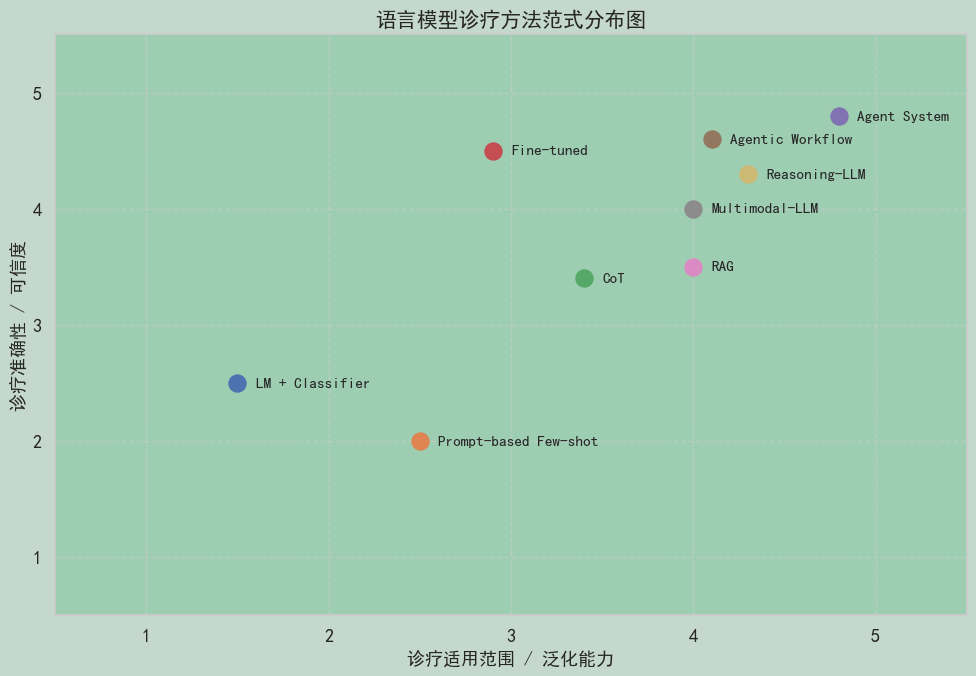

In [189]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'  # 黑体，适用于大部分中文系统
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 方法名及其坐标（x: 方法自主性，y: 上下文/多模态处理能力）
methods = {
    "LM + Classifier": (1.5, 2.5),
    "Prompt-based Few-shot": (2.5, 2),
    "CoT": (3.4, 3.4),
    "Fine-tuned": (2.9, 4.5),
    "Agent System": (4.8, 4.8),
    "Agentic Workflow": (4.1, 4.6),
    "RAG": (4, 3.5),
    "Multimodal-LLM": (4, 4.0),
    "Reasoning-LLM": (4.3, 4.3)
}

# 绘图
fig, ax = plt.subplots(figsize=(10, 7))

# 设置背景颜色
fig.patch.set_facecolor('#c5d8cd')     # 整个画布背景色（偏淡蓝）
ax.set_facecolor('#9eceb2')            # 绘图区背景色（稍深一点）

for method, (x, y) in methods.items():
    ax.scatter(x, y, s=150, label=method)
    ax.text(x + 0.1, y, method, fontsize=11, va='center')

# 坐标轴标签与范围
ax.set_xlim(0.5, 5.5)
ax.set_ylim(0.5, 5.5)
ax.set_xlabel("诊疗适用范围 / 泛化能力", fontsize=13)
ax.set_ylabel("诊疗准确性 / 可信度", fontsize=13)
ax.set_title("语言模型诊疗方法范式分布图", fontsize=15)

ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 绘制性能比较柱状图

/tmp/ipykernel_11690/864982564.py:43: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='Disease', y='Performance', hue='Model', data=df,


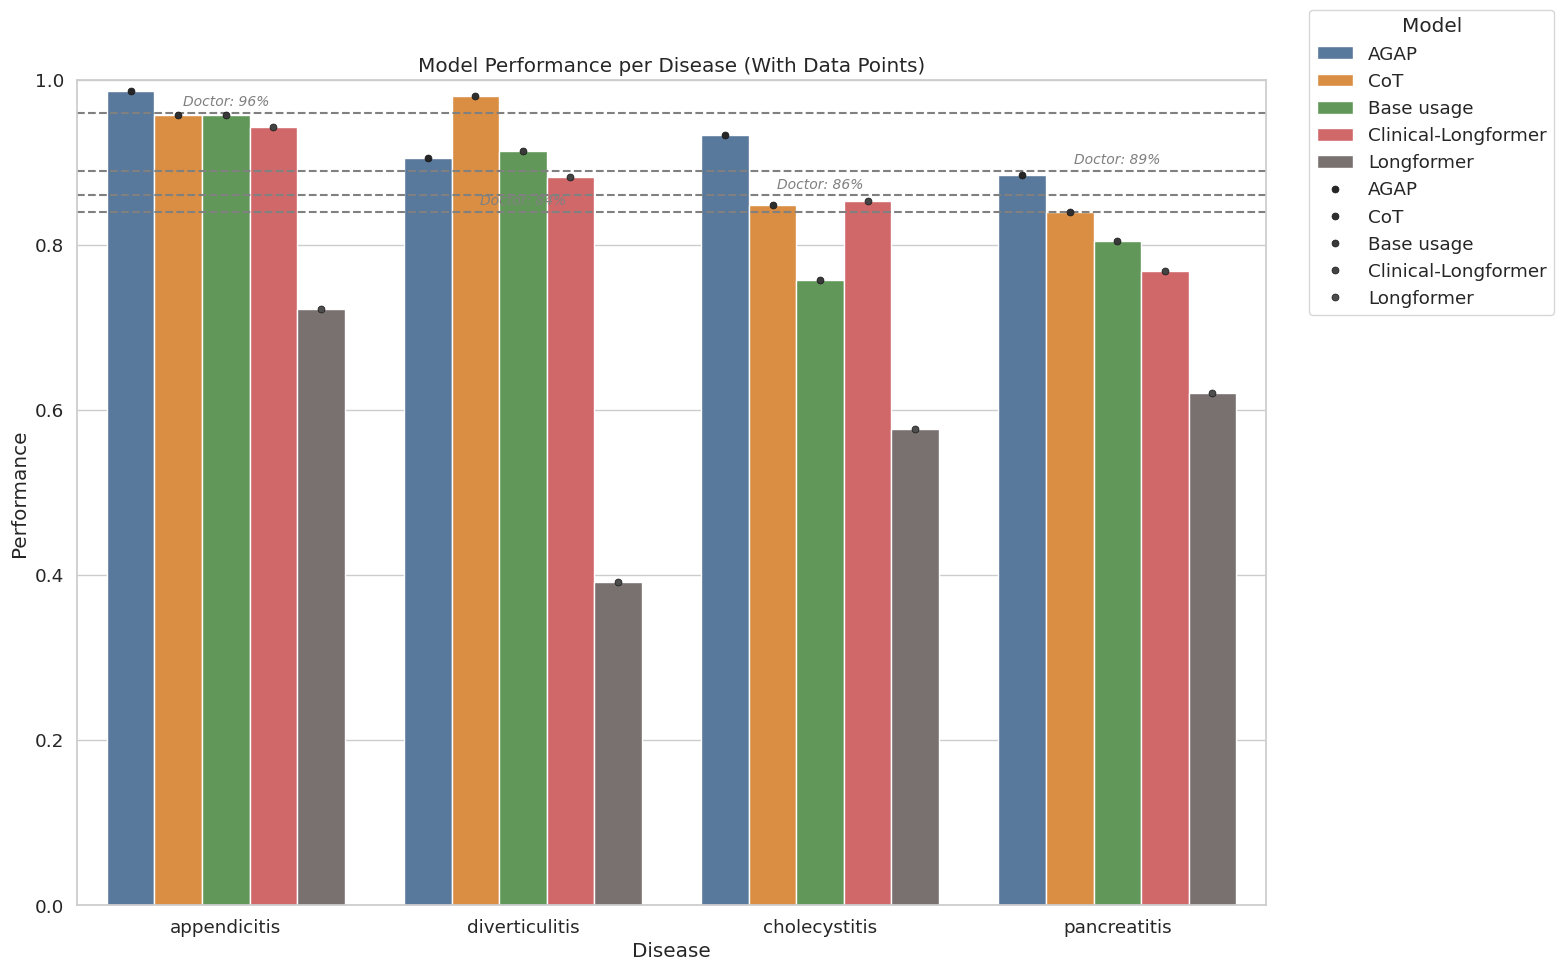

In [212]:
import seaborn as sns


doctor_acc = {
    'appendicitis': 0.96,
    'cholecystitis': 0.84,
    'diverticulitis': 0.86,
    'pancreatitis': 0.89
}

data = {
    'Disease': ['appendicitis'] * 5 + ['diverticulitis'] * 5 + ['cholecystitis'] * 5 + ['pancreatitis'] * 5,
    'Model': ['AGAP', 'CoT', 'Base usage', 'Clinical-Longformer', 'Longformer'] * 4,
    'Performance': [
        0.986, 0.957, 0.957, 0.9424, 0.7225,   # appendicitis, full: 0.99
        0.905, 0.981, 0.914, 0.8824, 0.3922,   # diverticulitis, full: 0.926
        0.933, 0.848, 0.757, 0.8538, 0.5769,   # cholecystitis, full: 0.90
        0.885, 0.840, 0.805, 0.7685, 0.6204    # pancreatitis, full: 0.901
    ]
}

# 转为 DataFrame
df = pd.DataFrame(data)

# 设置风格
sns.set_theme(style="whitegrid")

# 设置颜色
palette = {
    'AGAP': '#4E79A7',
    'CoT': '#F28E2B',
    'Base usage': '#59A14F',
    'Clinical-Longformer': '#E15759',
    'Longformer': '#79706E'
}
plt.figure(figsize=(16, 10))
sns.set_theme(style="whitegrid", font_scale=1.2)

# Bar plot 本体
barplot = sns.barplot(x='Disease', y='Performance', hue='Model', data=df, palette=palette, errorbar=None)

# Overlay individual points
sns.stripplot(x='Disease', y='Performance', hue='Model', data=df, 
              dodge=True, palette='dark:.3', marker='o', size=5, linewidth=0.5, edgecolor='gray')

# 添加医生参考线和文字
for i, (pathology, acc) in enumerate(doctor_acc.items()):
    plt.axhline(y=acc, color='gray', linestyle='--', linewidth=1.5)
    plt.text(i, acc + 0.005, f'Doctor: {acc*100:.0f}%', color='gray', ha='center', va='bottom', fontsize=10, style='italic')

# 美化图形
plt.ylim(0.0, 1.0)
plt.ylabel('Performance')
plt.xlabel('Disease')
plt.title('Model Performance per Disease (With Data Points)')
plt.legend(title='Model', loc='center right', bbox_to_anchor=(1.25, 0.9), ncol=1)

plt.tight_layout()
plt.savefig("model_performance_with_points.png", dpi=400, bbox_inches='tight')
plt.show()


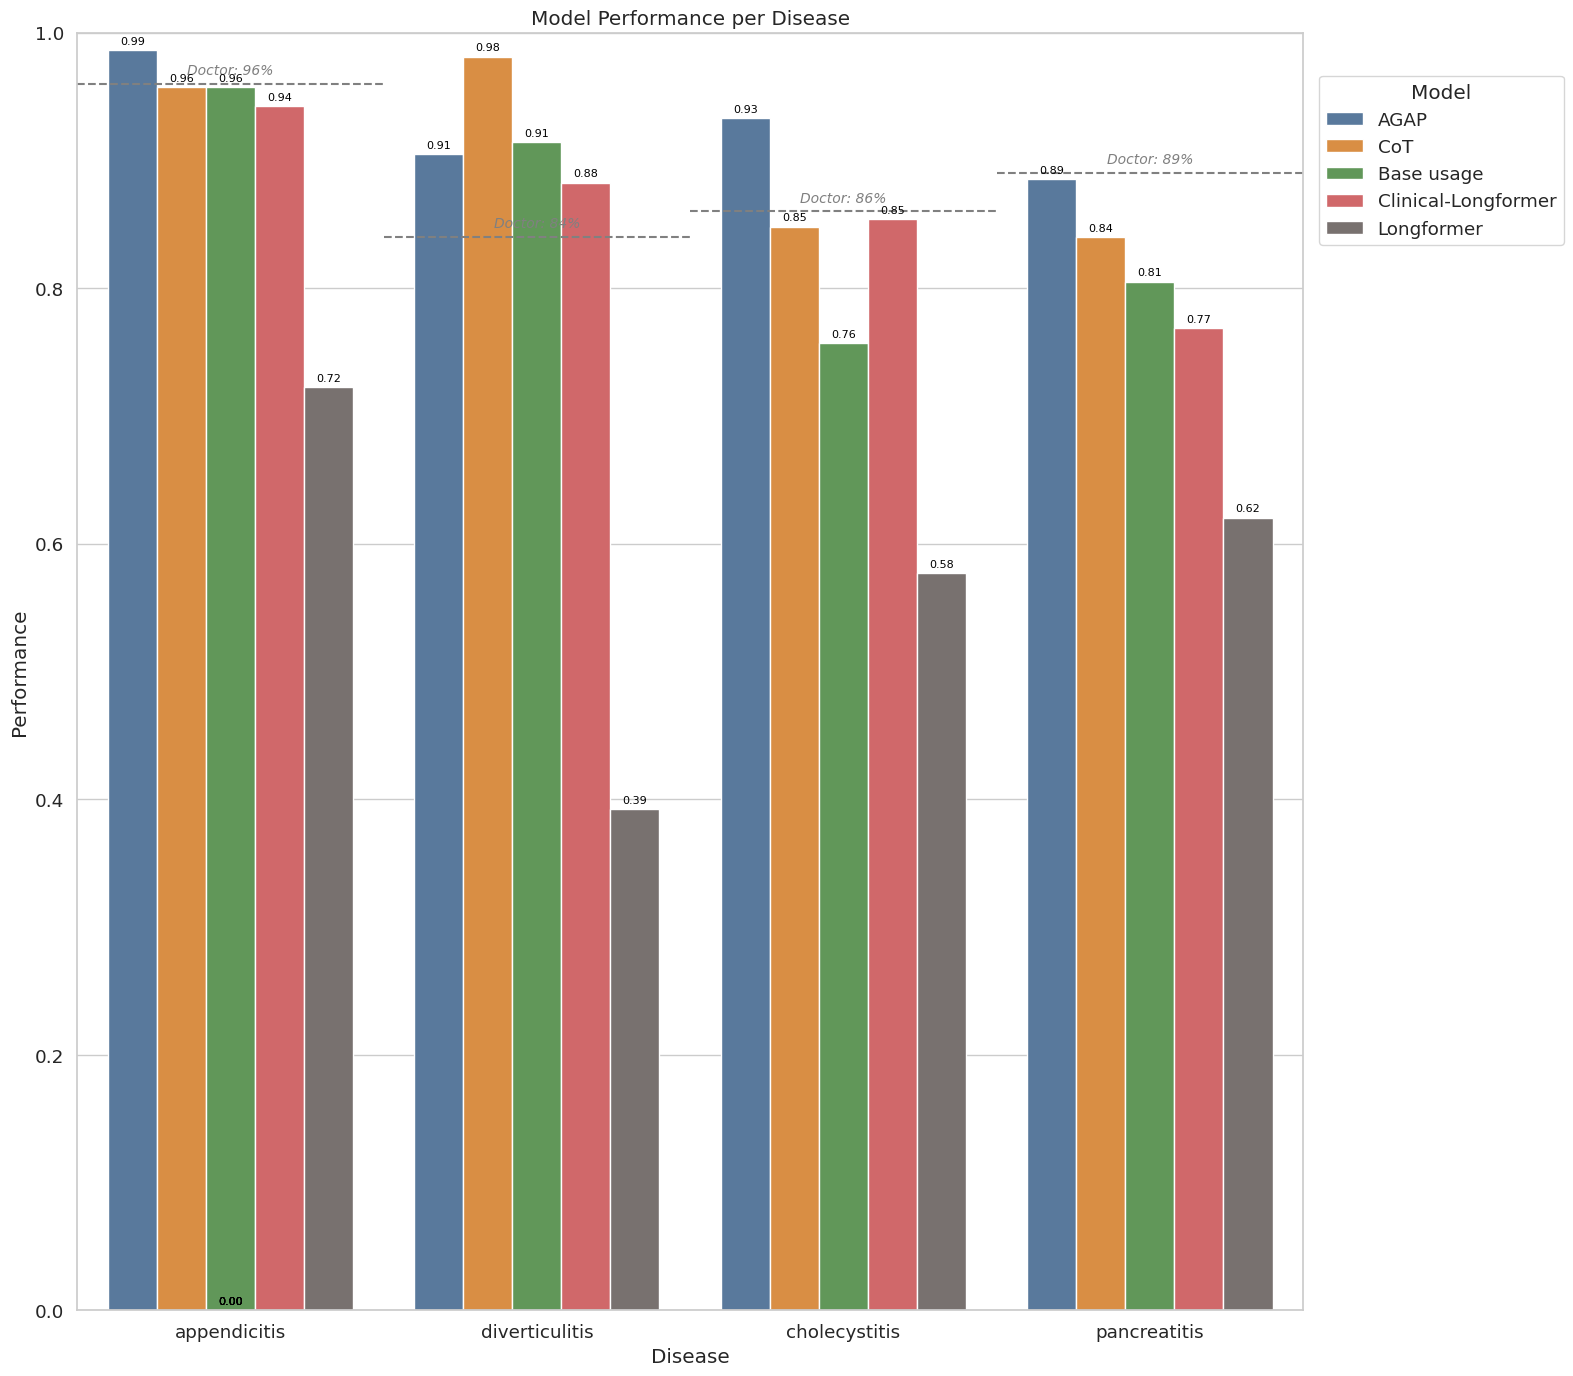

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

doctor_acc = {
    'appendicitis': 0.96,
    'cholecystitis': 0.84,
    'diverticulitis': 0.86,
    'pancreatitis': 0.89
}

data = {
    'Disease': ['appendicitis'] * 5 + ['diverticulitis'] * 5 + ['cholecystitis'] * 5 + ['pancreatitis'] * 5,
    'Model': ['AGAP', 'CoT', 'Base usage', 'Clinical-Longformer', 'Longformer'] * 4,
    'Performance': [
        0.986, 0.957, 0.957, 0.9424, 0.7225,   # appendicitis, full: 0.99
        0.905, 0.981, 0.914, 0.8824, 0.3922,   # diverticulitis, full: 0.926
        0.933, 0.848, 0.757, 0.8538, 0.5769,   # cholecystitis, full: 0.90
        0.885, 0.840, 0.805, 0.7685, 0.6204    # pancreatitis, full: 0.901
    ]
}

# 转为 DataFrame
df = pd.DataFrame(data)

# 设置风格
sns.set_theme(style="whitegrid")

# 设置颜色
palette = {
    'AGAP': '#4E79A7',
    'CoT': '#F28E2B',
    'Base usage': '#59A14F',
    'Clinical-Longformer': '#E15759',
    'Longformer': '#79706E'
}

# 设定图形大小与样式
plt.figure(figsize=(16, 14))
sns.set_theme(style="whitegrid", font_scale=1.2)

# 绘制柱状图
barplot = sns.barplot(x='Disease', y='Performance', hue='Model', data=df, palette=palette, errorbar=None)

# 添加医生准确率参考线
for i, pathology in enumerate(doctor_acc.keys()):
    plt.axhline(y=doctor_acc[pathology], color='gray', linestyle='--', linewidth=1.5, xmin=i*0.25, xmax=(i+1)*0.25)

# 添加医生准确率标签
for i, (pathology, acc) in enumerate(doctor_acc.items()):
    plt.text(i, acc + 0.005, f'Doctor: {acc*100:.0f}%', color='gray', ha='center', va='bottom', fontsize=10, style='italic')

# 添加数值标签
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=8, color='black', xytext=(0, 3),
                     textcoords='offset points')


# 设定轴标签与标题
plt.ylim(0.0, 1.0)
plt.ylabel('Performance')
plt.xlabel('Disease')
plt.title('Model Performance per Disease')
plt.legend(title='Model', loc='center right', bbox_to_anchor=(1.22, 0.9)) # loc='upper right'

plt.tight_layout()
plt.savefig("/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/Model_Performance_per_Disease_longformer.png", dpi=400, bbox_inches='tight')
plt.show()

### 4

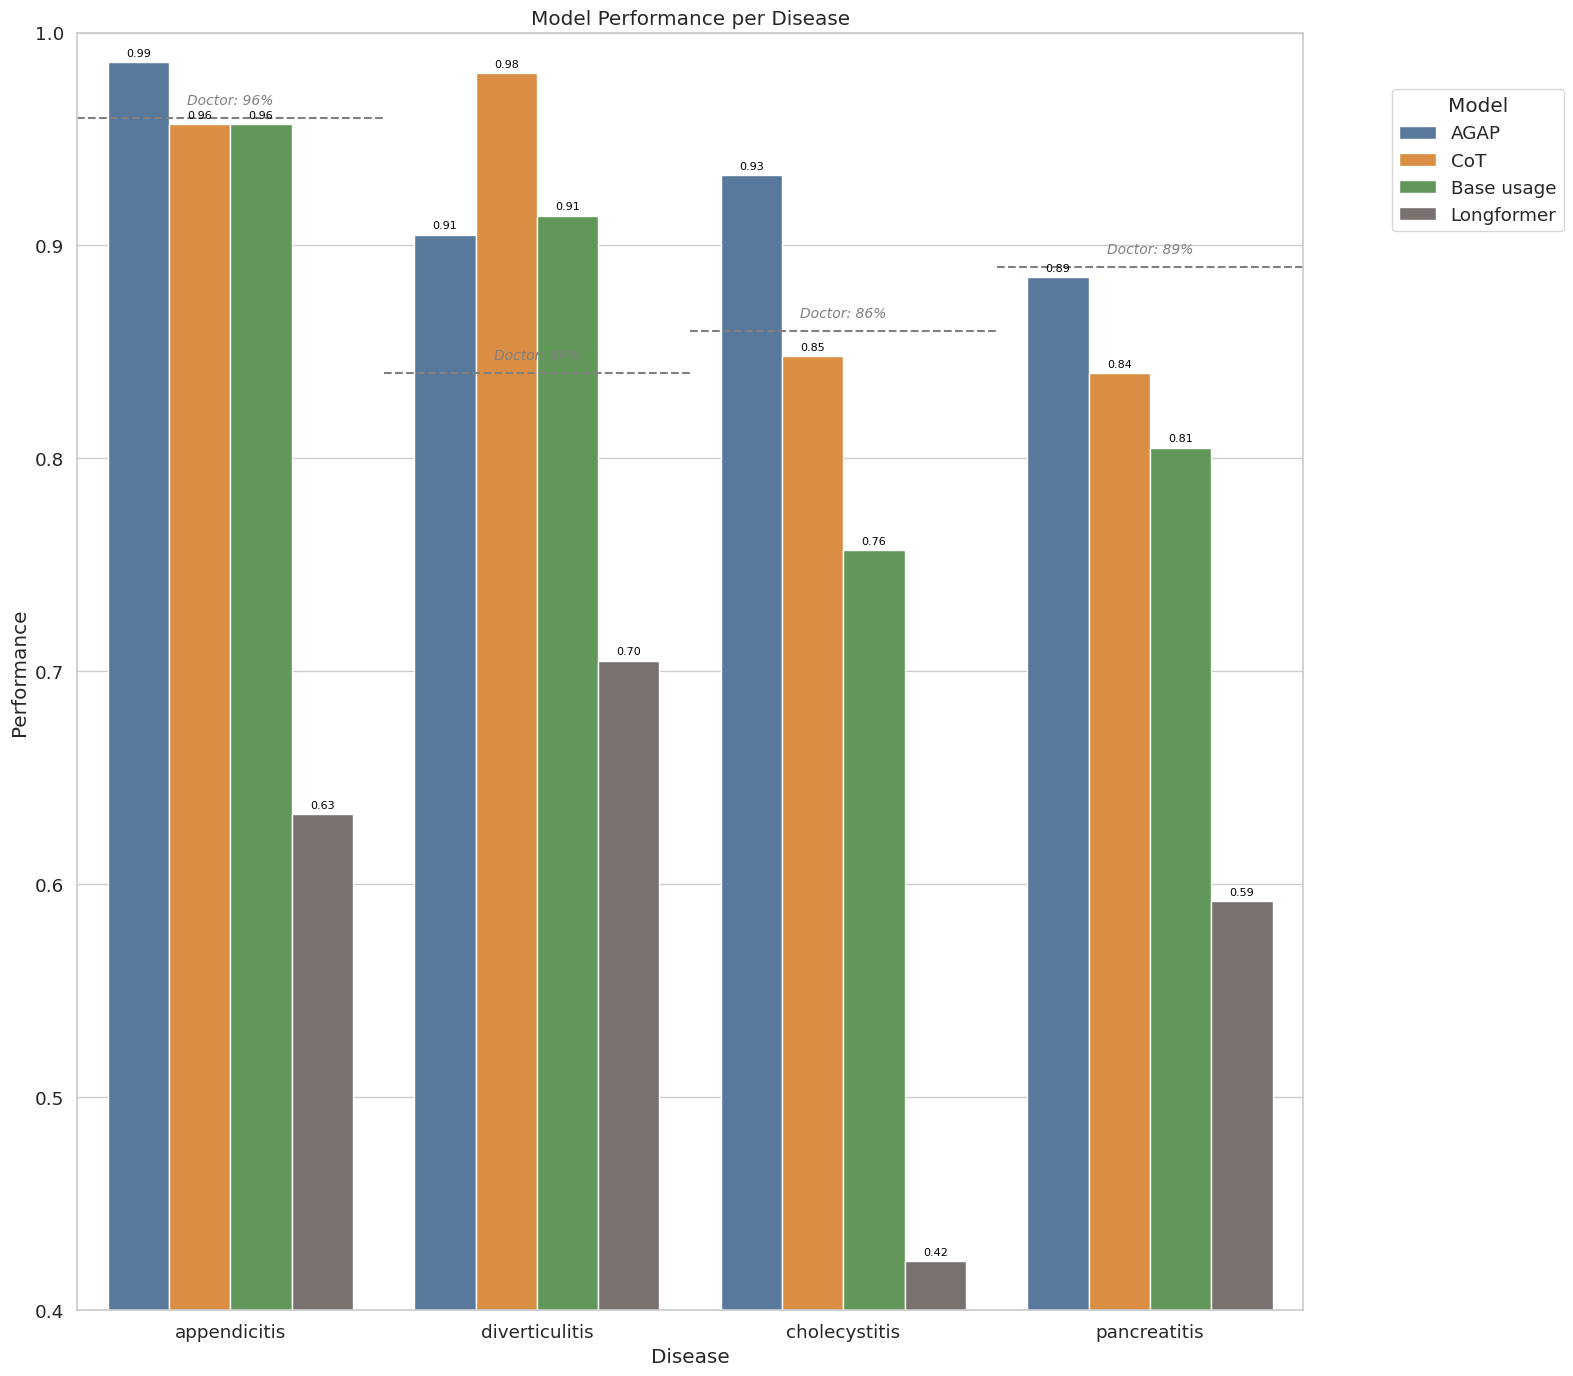

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

doctor_acc = {
    'appendicitis': 0.96,
    'cholecystitis': 0.84,
    'diverticulitis': 0.86,
    'pancreatitis': 0.89
}

data = {
    'Disease': ['appendicitis'] * 4 + ['diverticulitis'] * 4 + ['cholecystitis'] * 4 + ['pancreatitis'] * 4,
    'Model': ['AGAP', 'CoT', 'Base usage', 'Longformer'] * 4,
    'Performance': [
        0.986, 0.957, 0.957, 0.633,   # appendicitis, full: 0.99
        0.905, 0.981, 0.914, 0.705,   # diverticulitis, full: 0.926
        0.933, 0.848, 0.757, 0.423,   # cholecystitis, full: 0.90
        0.885, 0.840, 0.805, 0.592    # pancreatitis, full: 0.901
    ]
}

# 转为 DataFrame
df = pd.DataFrame(data)

# 设置风格
sns.set_theme(style="whitegrid")

# 设置颜色
palette = {
    'AGAP': '#4E79A7',
    'CoT': '#F28E2B',
    'Base usage': '#59A14F',
    'Clinical-Longformer': '#E15759',
    'Longformer': '#79706E'
}

# 设定图形大小与样式
plt.figure(figsize=(16, 14))
sns.set_theme(style="whitegrid", font_scale=1.2)

# 绘制柱状图
barplot = sns.barplot(x='Disease', y='Performance', hue='Model', data=df, palette=palette, errorbar=None)

# 添加医生准确率参考线
for i, pathology in enumerate(doctor_acc.keys()):
    plt.axhline(y=doctor_acc[pathology], color='gray', linestyle='--', linewidth=1.5, xmin=i*0.25, xmax=(i+1)*0.25)

# 添加医生准确率标签
for i, (pathology, acc) in enumerate(doctor_acc.items()):
    plt.text(i, acc + 0.005, f'Doctor: {acc*100:.0f}%', color='gray', ha='center', va='bottom', fontsize=10, style='italic')

# 添加数值标签
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     fontsize=8, color='black', xytext=(0, 3),
                     textcoords='offset points')


# 设定轴标签与标题
plt.ylim(0.4, 1.0)
plt.ylabel('Performance')
plt.xlabel('Disease')
plt.title('Model Performance per Disease')
plt.legend(title='Model', loc='center right', bbox_to_anchor=(1.22, 0.9)) # loc='upper right'

plt.tight_layout()
plt.savefig("/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/Model_Performance_per_Disease.png", dpi=400, bbox_inches='tight')
plt.show()

### 雷达图

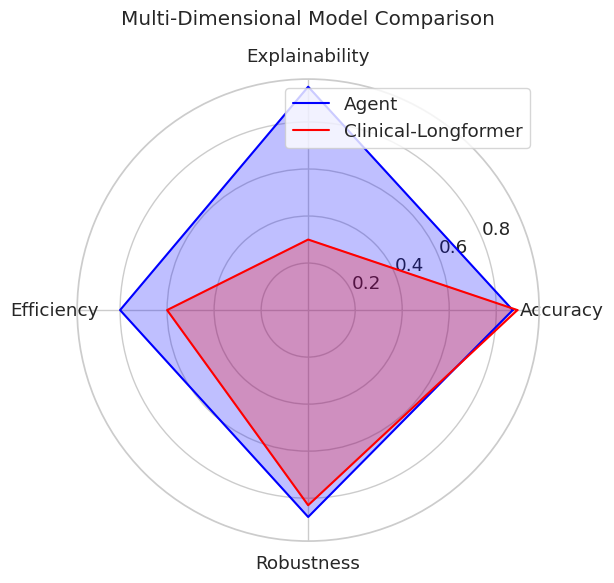

In [2692]:
from math import pi
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据
categories = ['Accuracy', 'Explainability', 'Efficiency', 'Robustness']
agent_values = [0.87, 0.95, 0.80, 0.88]
baseline_values = [0.89, 0.30, 0.60, 0.83]

df = pd.DataFrame({
    'Metric': categories,
    'Agent': agent_values,
    'Clinical-Longformer': baseline_values
})

# 转为雷达图格式
labels = df['Metric'].values
num_vars = len(labels)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# 数据准备
agent = agent_values + agent_values[:1]
baseline = baseline_values + baseline_values[:1]

# 画图
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, agent, label='Agent', color='blue')
ax.fill(angles, agent, alpha=0.25, color='blue')
ax.plot(angles, baseline, label='Clinical-Longformer', color='red')
ax.fill(angles, baseline, alpha=0.25, color='red')

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc='upper right')
plt.title("Multi-Dimensional Model Comparison", y=1.1)
plt.show()


## AGAP整个数据集的指标分析

/tmp/ipykernel_109280/1868602330.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_recall, x="Disease", y="Recall", ax=axes[0, 0], palette="Blues_d")


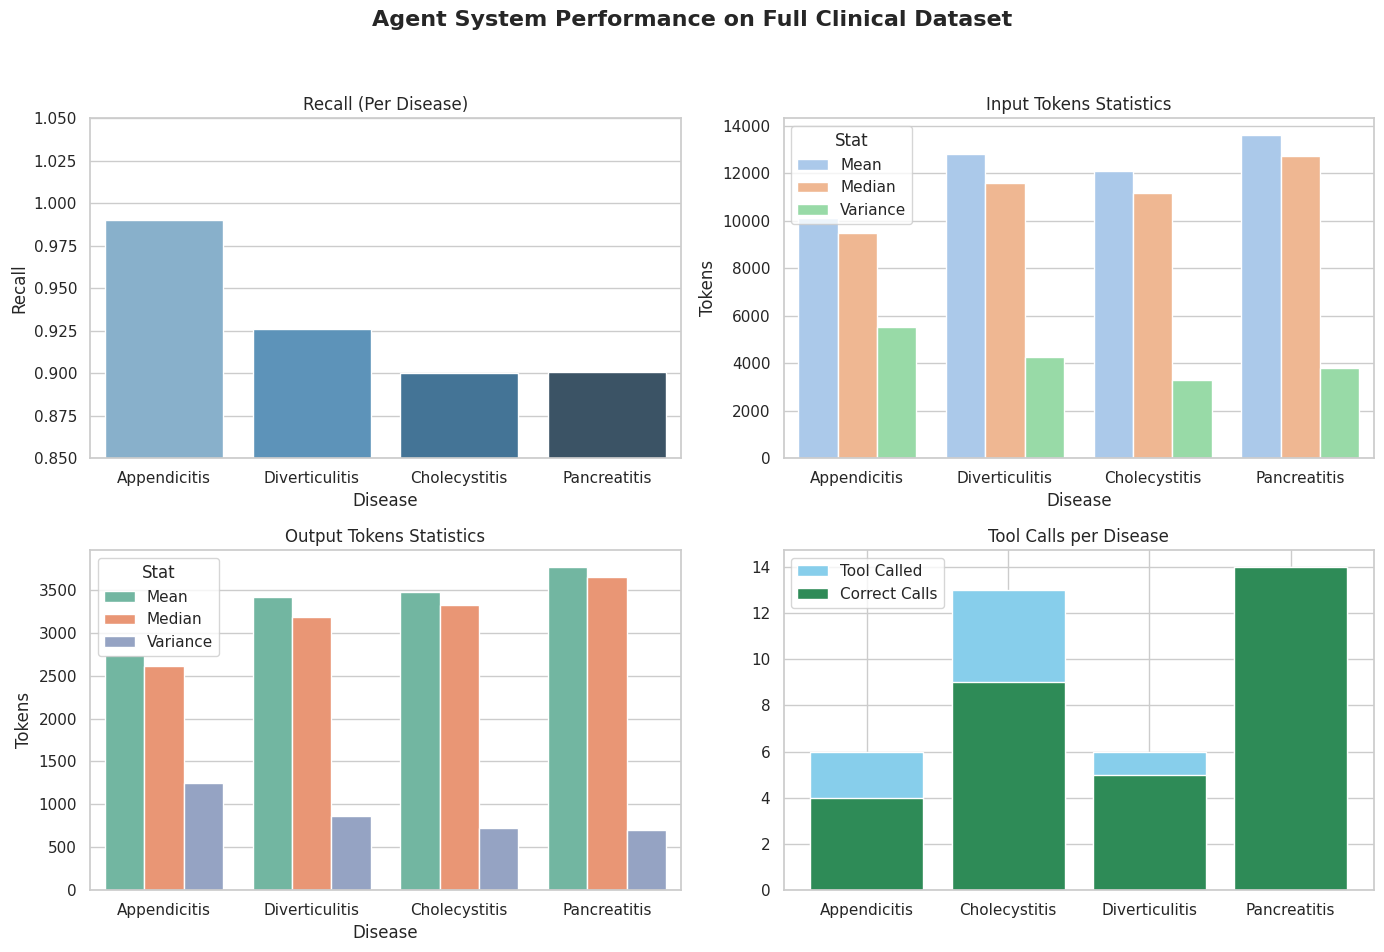

In [2706]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 设置绘图风格
sns.set_theme(style="whitegrid")

# 准确率（recall）
recall_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Recall": [0.99, 0.926, 0.90, 0.901]
}
df_recall = pd.DataFrame(recall_data)

# 输入 tokens
input_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [10117.10, 12792.51, 12093.11, 13622.86],
    "Median": [9468.0, 11584.0, 11167.5, 12712.5],
    "Variance": [5533.24, 4240.84, 3281.15, 3806.80]
}
df_input_tokens = pd.DataFrame(input_tokens_data)

# 输出 tokens
output_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [2746.15, 3416.47, 3469.23, 3771.18],
    "Median": [2611.0, 3185.0, 3323.5, 3651.5],
    "Variance": [1248.83, 862.73, 721.01, 706.77]
}
df_output_tokens = pd.DataFrame(output_tokens_data)

# 工具调用次数
tool_calls_data = {
    "Disease": ["Appendicitis", "Cholecystitis", "Diverticulitis", "Pancreatitis"],
    "Tool Called": [6, 13, 6, 14],
    "Tool Correct": [4, 9, 5, 14],
}
df_tool_calls = pd.DataFrame(tool_calls_data)
df_tool_calls["Correctness Rate"] = df_tool_calls["Tool Correct"] / df_tool_calls["Tool Called"]

# 画图
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Agent System Performance on Full Clinical Dataset", fontsize=16, fontweight="bold")

# 图1: Recall per disease
sns.barplot(data=df_recall, x="Disease", y="Recall", ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Recall (Per Disease)")
axes[0, 0].set_ylim(0.85, 1.05)

# 图2: Input tokens
df_input_tokens_melt = df_input_tokens.melt(id_vars="Disease", var_name="Stat", value_name="Tokens")
sns.barplot(data=df_input_tokens_melt, x="Disease", y="Tokens", hue="Stat", ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title("Input Tokens Statistics")
axes[0, 1].legend(title="Stat")

# 图3: Output tokens
df_output_tokens_melt = df_output_tokens.melt(id_vars="Disease", var_name="Stat", value_name="Tokens")
sns.barplot(data=df_output_tokens_melt, x="Disease", y="Tokens", hue="Stat", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Output Tokens Statistics")
axes[1, 0].legend(title="Stat")

# 图4: Tool call count and correctness
bar1 = axes[1, 1].bar(df_tool_calls["Disease"], df_tool_calls["Tool Called"], label="Tool Called", color="skyblue")
bar2 = axes[1, 1].bar(df_tool_calls["Disease"], df_tool_calls["Tool Correct"], label="Correct Calls", color="seagreen")
axes[1, 1].set_title("Tool Calls per Disease")
axes[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


/tmp/ipykernel_109280/1025288652.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_recall, x="Disease", y="Recall", ax=axes[0, 0], palette="Blues_d")


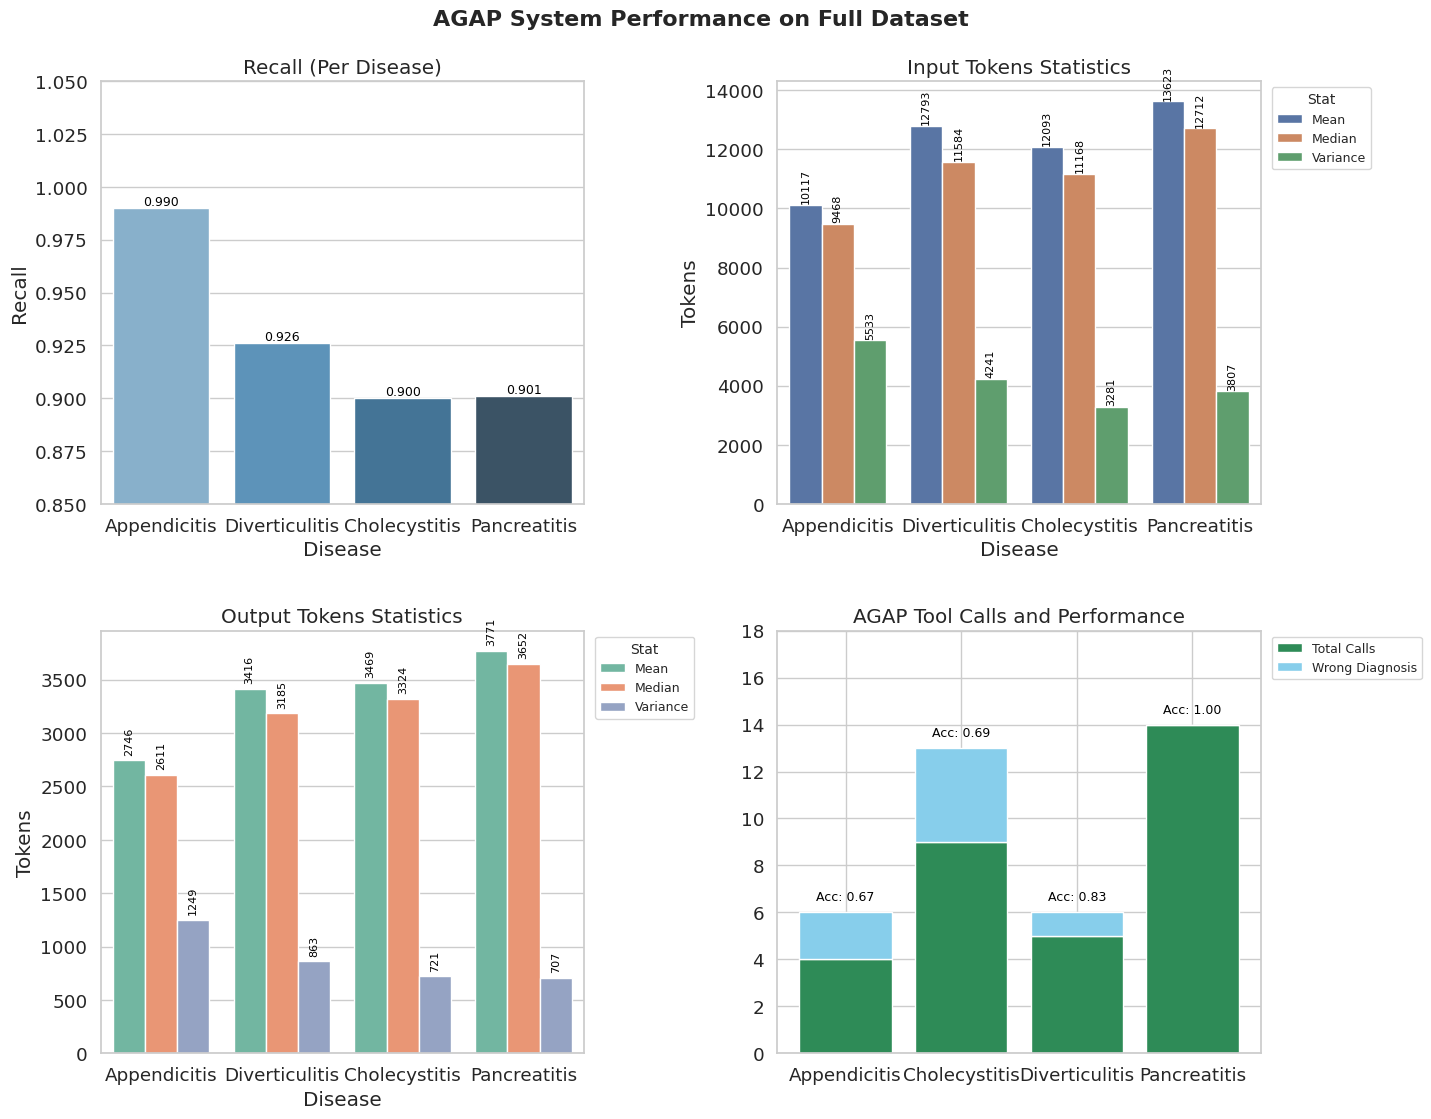

In [2755]:
# 添加工具调用性能到图表中，优化图例位置，并加上数值标签

# 准确率（recall）
recall_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Recall": [0.99, 0.926, 0.90, 0.901]
}
df_recall = pd.DataFrame(recall_data)

# 输入 tokens
input_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [10117.10, 12792.51, 12093.11, 13622.86],
    "Median": [9468, 11584.0, 11167.5, 12712.5],
    "Variance": [5533.24, 4240.84, 3281.15, 3806.80]
}
df_input_tokens = pd.DataFrame(input_tokens_data)

# 输出 tokens
output_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [2746.15, 3416.47, 3469.23, 3771.18],
    "Median": [2611, 3185.0, 3323.5, 3651.5],
    "Variance": [1248.83, 862.73, 721.01, 706.77]
}
df_output_tokens = pd.DataFrame(output_tokens_data)

# 工具调用次数
tool_calls_data = {
    "Disease": ["Appendicitis", "Cholecystitis", "Diverticulitis", "Pancreatitis"],
    "Tool Called": [6, 13, 6, 14],
    "Tool Correct": [4, 9, 5, 14],
}
df_tool_calls = pd.DataFrame(tool_calls_data)
df_tool_calls["Correctness Rate"] = df_tool_calls["Tool Correct"] / df_tool_calls["Tool Called"]

# 添加数值标签 - 图2和图3通用
def add_value_labels(ax, rotation=90, offset=20, threshold=50):
    for p in ax.patches:
        height = p.get_height()
        if height < threshold:
            # 小于阈值不显示标签，避免显示0或挤在底部
            continue
        ax.annotate(f'{height:.0f}', 
                    (p.get_x() + p.get_width() / 2., height + offset),  # 标签放柱顶上方offset个单位
                    ha='center', va='bottom', fontsize=8, color='black', rotation=rotation)

# 初始化画布
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("AGAP System Performance on Full Dataset", fontsize=16, fontweight="bold")

# 图1: Recall per disease
sns.barplot(data=df_recall, x="Disease", y="Recall", ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_title("Recall (Per Disease)")
axes[0, 0].set_ylim(0.85, 1.05)

# 添加数值标签
for p in axes[0, 0].patches:
    axes[0, 0].annotate(f'{p.get_height():.3f}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')

# 图2: Input tokens
df_input_tokens_melt = df_input_tokens.melt(id_vars="Disease", var_name="Stat", value_name="Tokens")
sns.barplot(data=df_input_tokens_melt, x="Disease", y="Tokens", hue="Stat", 
            hue_order=["Mean", "Median", "Variance"], ax=axes[0, 1],
) # palette="pastel"
axes[0, 1].set_title("Input Tokens Statistics")
axes[0, 1].legend(title="Stat", loc="upper left", bbox_to_anchor=(1.01, 1), fontsize=9, title_fontsize=10,)

# # 添加数值标签
# for p in axes[0, 1].patches:
#     height = p.get_height()
#     axes[0, 1].annotate(f'{height:.0f}', 
#                         (p.get_x() + p.get_width() / 2., height),
#                         ha='center', va='bottom', fontsize=8, color='black', rotation=90)

# 图3: Output tokens
df_output_tokens_melt = df_output_tokens.melt(id_vars="Disease", var_name="Stat", value_name="Tokens")
sns.barplot(data=df_output_tokens_melt, x="Disease", y="Tokens", hue="Stat", 
            hue_order=["Mean", "Median", "Variance"], ax=axes[1, 0], palette="Set2",
)
axes[1, 0].set_title("Output Tokens Statistics")
axes[1, 0].legend(title="Stat", loc="upper left", bbox_to_anchor=(1.01, 1), fontsize=9, title_fontsize=10)

# # 添加数值标签
# for p in axes[1, 0].patches:
#     height = p.get_height()
#     axes[1, 0].annotate(f'{height:.0f}', 
#                         (p.get_x() + p.get_width() / 2., height),
#                         ha='center', va='bottom', fontsize=8, color='black', rotation=90)

# 用法示例：
add_value_labels(axes[0, 1], rotation=90, offset=50, threshold=100)
add_value_labels(axes[1, 0], rotation=90, offset=50, threshold=100)

# 图4: Tool call count, correct calls, and correctness rate
ax = axes[1, 1]

# 先清空这个子图（如果之前有误画过）
ax.clear()

# 计算错误调用
df_tool_calls["Wrong Calls"] = df_tool_calls["Tool Called"] - df_tool_calls["Tool Correct"]

# 正确调用（绿色）在下方
bar_correct = ax.bar(df_tool_calls["Disease"], df_tool_calls["Tool Correct"], label="Total Calls", color="seagreen")

# 错误调用（蓝色）在上方
bar_wrong = ax.bar(df_tool_calls["Disease"], df_tool_calls["Wrong Calls"],
                   bottom=df_tool_calls["Tool Correct"], label="Wrong Diagnosis", color="skyblue")

# 添加正确率标签（放在总柱子顶上）
for idx, val in enumerate(df_tool_calls["Correctness Rate"]):
    ax.text(idx, df_tool_calls["Tool Called"][idx] + 0.5,
            f'Acc: {val:.2f}', ha='center', fontsize=9, color='black')

ax.set_title("AGAP Tool Calls and Performance")

# 可选：y轴范围留白，避免标签超出
# 设置整数刻度
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, df_tool_calls["Tool Called"].max() + 4)
# 调整图例位置，避免遮挡
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9, title_fontsize=10)


plt.subplots_adjust(top=0.92, right=0.85, hspace=0.3, wspace=0.4)
# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/AGAP_on_full_dataset.png", dpi=400, bbox_inches='tight')
plt.show()

In [15]:
full_df = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/AGAP_full_dataset_own.csv')
full_df.columns

Index(['hadm_id', 'diagnosis', 'ab_hpi', 'ab_pe', 'ab_lab', 'ab_ima',
       'diag_app', 'diag_cho', 'diag_div', 'diag_pan', 'final_review',
       'other_process', 'input_tokens', 'output_tokens', 'total_tokens',
       'timetaken', 'tool_called'],
      dtype='object')

In [17]:
print(full_df['input_tokens'].mean())
print(full_df['input_tokens'].median())
print(full_df['input_tokens'].std())

11722.99125
10746.0
4718.5916656050995


In [18]:
print(full_df['output_tokens'].mean())
print(full_df['output_tokens'].median())
print(full_df['output_tokens'].std())

3242.9408333333336
3091.5
1063.4961361060207


In [16]:
print(full_df['timetaken'].mean())
print(full_df['timetaken'].median())
print(full_df['timetaken'].std())

17.309866666666668
16.3
7.445517742569134


In [19]:
cost = 11722.99125 * 2 / 1000000 + 3242.9408333333336 * 8 / 1000000
print(cost)

0.049389509166666665


/tmp/ipykernel_80882/3818690852.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_recall, x="Disease", y="Recall", ax=ax, palette="Set2", hue=None)


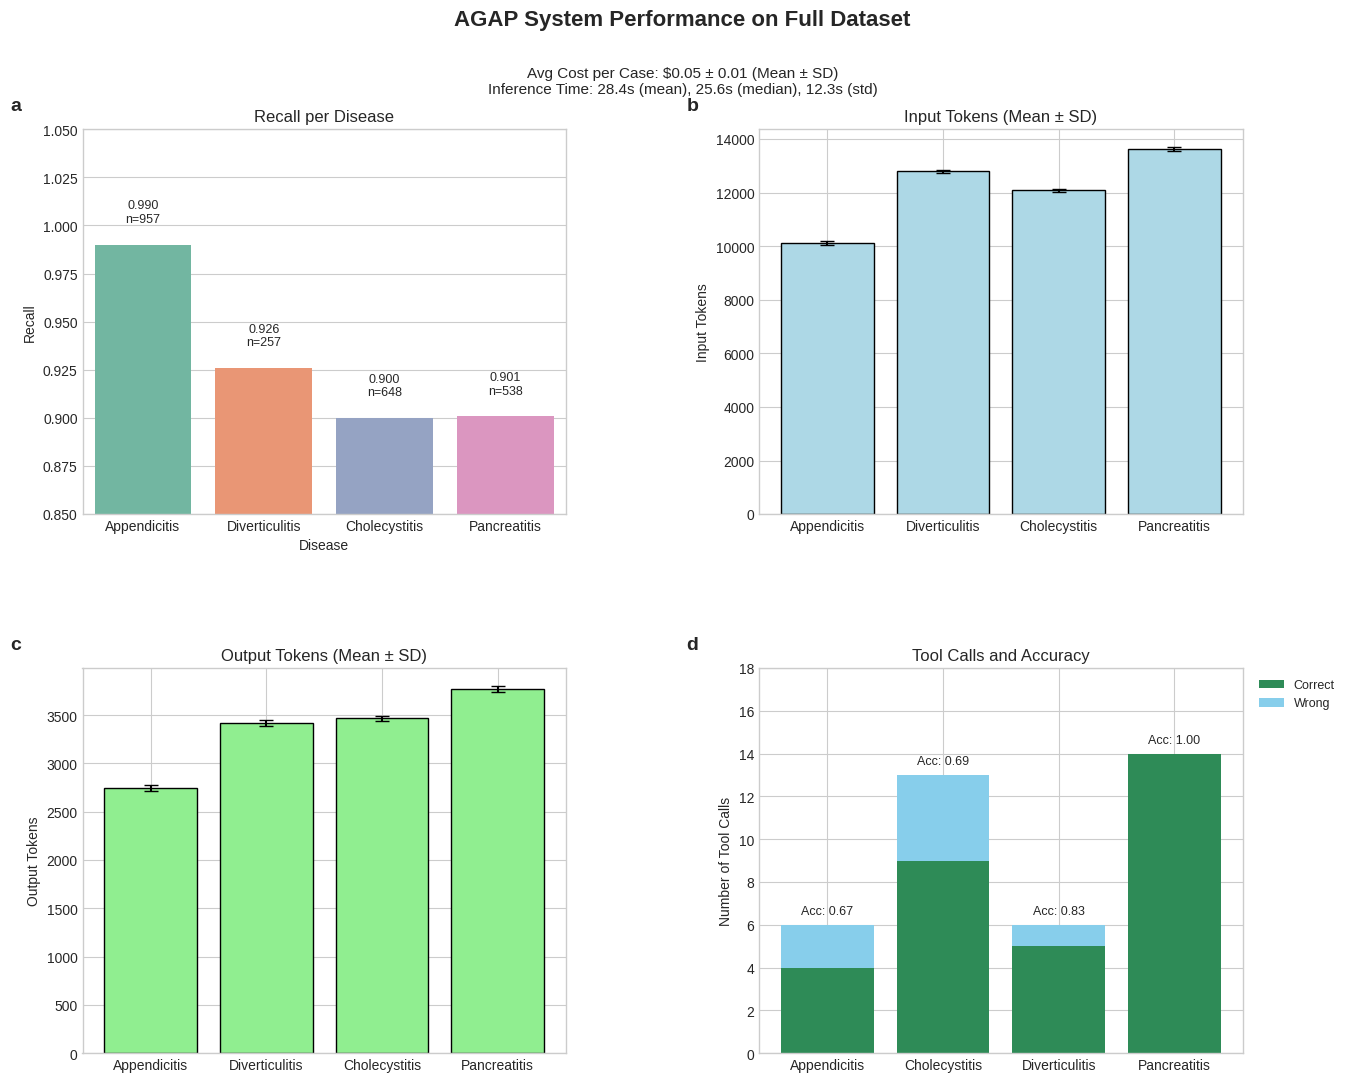

(np.float64(0.05111885), np.float64(0.006404053572220227))

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 假设 full_df 的统计信息如下（请替换为实际数据）：
time_mean = 28.4  # 秒
time_median = 25.6
time_std = 12.3

# token 成本计算函数（百万token成本）
def compute_cost(input_tokens, output_tokens):
    return input_tokens * 2 / 1e6 + output_tokens * 8 / 1e6

# 样本数（n）
disease_n = {
    "Appendicitis": 957,
    "Diverticulitis": 257,
    "Cholecystitis": 648,
    "Pancreatitis": 538,
}

# ---- Data Preparation ----
recall_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Recall": [0.99, 0.926, 0.90, 0.901]
}
df_recall = pd.DataFrame(recall_data)
df_recall["n"] = df_recall["Disease"].map(disease_n)

input_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [10117.10, 12792.51, 12093.11, 13622.86],
    "Median": [9468, 11584.0, 11167.5, 12712.5],
    "Std": [5533.24**0.5, 4240.84**0.5, 3281.15**0.5, 3806.80**0.5],
}
df_input_tokens = pd.DataFrame(input_tokens_data)

output_tokens_data = {
    "Disease": ["Appendicitis", "Diverticulitis", "Cholecystitis", "Pancreatitis"],
    "Mean": [2746.15, 3416.47, 3469.23, 3771.18],
    "Median": [2611, 3185.0, 3323.5, 3651.5],
    "Std": [1248.83**0.5, 862.73**0.5, 721.01**0.5, 706.77**0.5],
}
df_output_tokens = pd.DataFrame(output_tokens_data)

df_tool_calls = pd.DataFrame({
    "Disease": ["Appendicitis", "Cholecystitis", "Diverticulitis", "Pancreatitis"],
    "Tool Called": [6, 13, 6, 14],
    "Tool Correct": [4, 9, 5, 14],
})
df_tool_calls["Wrong Calls"] = df_tool_calls["Tool Called"] - df_tool_calls["Tool Correct"]
df_tool_calls["Correctness Rate"] = df_tool_calls["Tool Correct"] / df_tool_calls["Tool Called"]

# 修正 error bar 报错：显式将 yerr 转为 numpy array 并确保其 shape 正确（1D），并添加 abcd 标签到子图左上角
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("AGAP System Performance on Full Dataset", fontsize=16, fontweight="bold")

# Panel a: Recall with sample size
ax = axes[0, 0]
sns.barplot(data=df_recall, x="Disease", y="Recall", ax=ax, palette="Set2", hue=None)
for p, n in zip(ax.patches, df_recall['n']):
    ax.annotate(f'{p.get_height():.3f}\nn={n}', 
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.01),
                ha='center', va='bottom', fontsize=9)
ax.set_title("Recall per Disease")
ax.set_ylim(0.85, 1.05)
ax.text(-0.15, 1.05, "a", fontsize=14, fontweight='bold', transform=ax.transAxes)

# Panel b: Input Tokens
ax = axes[0, 1]
x = np.arange(len(df_input_tokens["Disease"]))
y = df_input_tokens["Mean"].values
yerr = df_input_tokens["Std"].values
ax.bar(x, y, yerr=yerr, capsize=5, color="lightblue", edgecolor="black")
ax.set_xticks(x)
ax.set_xticklabels(df_input_tokens["Disease"])
ax.set_title("Input Tokens (Mean ± SD)")
ax.set_ylabel("Input Tokens")
ax.text(-0.15, 1.05, "b", fontsize=14, fontweight='bold', transform=ax.transAxes)

# Panel c: Output Tokens
ax = axes[1, 0]
x = np.arange(len(df_output_tokens["Disease"]))
y = df_output_tokens["Mean"].values
yerr = df_output_tokens["Std"].values
ax.bar(x, y, yerr=yerr, capsize=5, color="lightgreen", edgecolor="black")
ax.set_xticks(x)
ax.set_xticklabels(df_output_tokens["Disease"])
ax.set_title("Output Tokens (Mean ± SD)")
ax.set_ylabel("Output Tokens")
ax.text(-0.15, 1.05, "c", fontsize=14, fontweight='bold', transform=ax.transAxes)

# Panel d: Tool usage
ax = axes[1, 1]
ax.bar(df_tool_calls["Disease"], df_tool_calls["Tool Correct"], label="Correct", color="seagreen")
ax.bar(df_tool_calls["Disease"], df_tool_calls["Wrong Calls"],
       bottom=df_tool_calls["Tool Correct"], label="Wrong", color="skyblue")
for idx, val in enumerate(df_tool_calls["Correctness Rate"]):
    ax.text(idx, df_tool_calls["Tool Called"][idx] + 0.5,
            f'Acc: {val:.2f}', ha='center', fontsize=9)
ax.set_title("Tool Calls and Accuracy")
ax.set_ylabel("Number of Tool Calls")
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), fontsize=9)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(0, df_tool_calls["Tool Called"].max() + 4)
ax.text(-0.15, 1.05, "d", fontsize=14, fontweight='bold', transform=ax.transAxes)

# 添加成本与时间说明
input_means = df_input_tokens["Mean"]
output_means = df_output_tokens["Mean"]
costs = compute_cost(input_means, output_means)
cost_text = f"Avg Cost per Case: ${costs.mean():.2f} ± {costs.std():.2f} (Mean ± SD)\n"
time_text = f"Inference Time: {time_mean:.1f}s (mean), {time_median:.1f}s (median), {time_std:.1f}s (std)"
fig.text(0.5, 0.91, cost_text + time_text, ha='center', fontsize=11)

plt.subplots_adjust(top=0.88, right=0.85, hspace=0.4, wspace=0.4)
plt.savefig("/media/luzhenyang/project/agent_graph_diag/AGAP/AGAP_on_full_dataset_final_with_errorbar_and_labels.png", dpi=300, bbox_inches='tight')
plt.show()

costs.mean(), costs.std()


# 以其他LLM作为Base Model的实验

In [197]:
import pandas as pd

df = pd.read_excel(
    '/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', 
    sheet_name='Gemini-2.5-Pro'
)

df.shape

(80, 4)

In [198]:
df_by_diagnosis = df.groupby('diagnosis')
df_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    对              14
                错               6
cholecystitis   对              17
                错               3
diverticulitis  对              16
                错               3
                空               1
pancreatitis    对              13
                错               6
                空               1
Name: count, dtype: int64

### 查看内部分层结果

In [199]:
## 1.GPT-4.1 as base with correct diagnosis
ref_true_gpt = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/stratification_samples/true_samples_id.csv')
ref_true_gpt['correctness'].value_counts()

correctness
对    40
Name: count, dtype: int64

In [200]:
df_ori_true = df[ df['hadm_id'].isin(ref_true_gpt['hadm_id'].values) ]

In [201]:
df_ori_true['hadm_id']

0     26086670
1     20843171
2     23011584
3     23611931
4     23189672
5     25887444
6     25527423
8     27562444
9     26162379
11    26618797
13    27444455
20    27022057
22    29653022
24    27563311
28    22080966
29    22263792
32    22738192
35    27632968
37    24934535
39    26354137
41    20414022
42    23051304
43    29617550
44    21987392
46    27743680
47    24214818
52    24604226
53    22165360
55    24510562
57    28627153
61    22047933
62    21435455
67    21612259
68    22348650
69    26365520
71    29827436
72    28835469
73    24642650
75    27541971
78    26308165
Name: hadm_id, dtype: int64

In [202]:
df_ori_false = df[ ~df['hadm_id'].isin(ref_true_gpt['hadm_id'].values) ]

In [203]:
df_ori_false['correctness'].value_counts()

correctness
对    20
错    18
空     2
Name: count, dtype: int64

In [204]:
df_ori_false_by_diagnosis = df_ori_false.groupby('diagnosis')
df_ori_false_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    错              6
                对              4
cholecystitis   对              7
                错              3
diverticulitis  对              6
                错              3
                空              1
pancreatitis    错              6
                对              3
                空              1
Name: count, dtype: int64

In [205]:
### llama3.3-70B
import pandas as pd

df = pd.read_excel(
    '/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', 
    sheet_name='llama3.3-70B-ins'
)

df.shape

(80, 5)

In [206]:
df_ori_true = df[ df['hadm_id'].isin(ref_true_gpt['hadm_id'].values) ]
df_ori_true['correctness'].value_counts()

correctness
对    38
错     2
Name: count, dtype: int64

In [207]:
df_ori_true_by_diagnosis = df_ori_true.groupby('diagnosis')
df_ori_true_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    对              10
cholecystitis   对              10
diverticulitis  对               8
                错               2
pancreatitis    对              10
Name: count, dtype: int64

In [208]:
df_ori_false = df[ ~df['hadm_id'].isin(ref_true_gpt['hadm_id'].values) ]
df_ori_false['correctness'].value_counts()

correctness
对    25
错    15
Name: count, dtype: int64

In [209]:
df_ori_false_by_diagnosis = df_ori_false.groupby('diagnosis')
df_ori_false_by_diagnosis['correctness'].value_counts()

diagnosis       correctness
appendicitis    错              6
                对              4
cholecystitis   对              7
                错              3
diverticulitis  对              7
                错              3
pancreatitis    对              7
                错              3
Name: count, dtype: int64

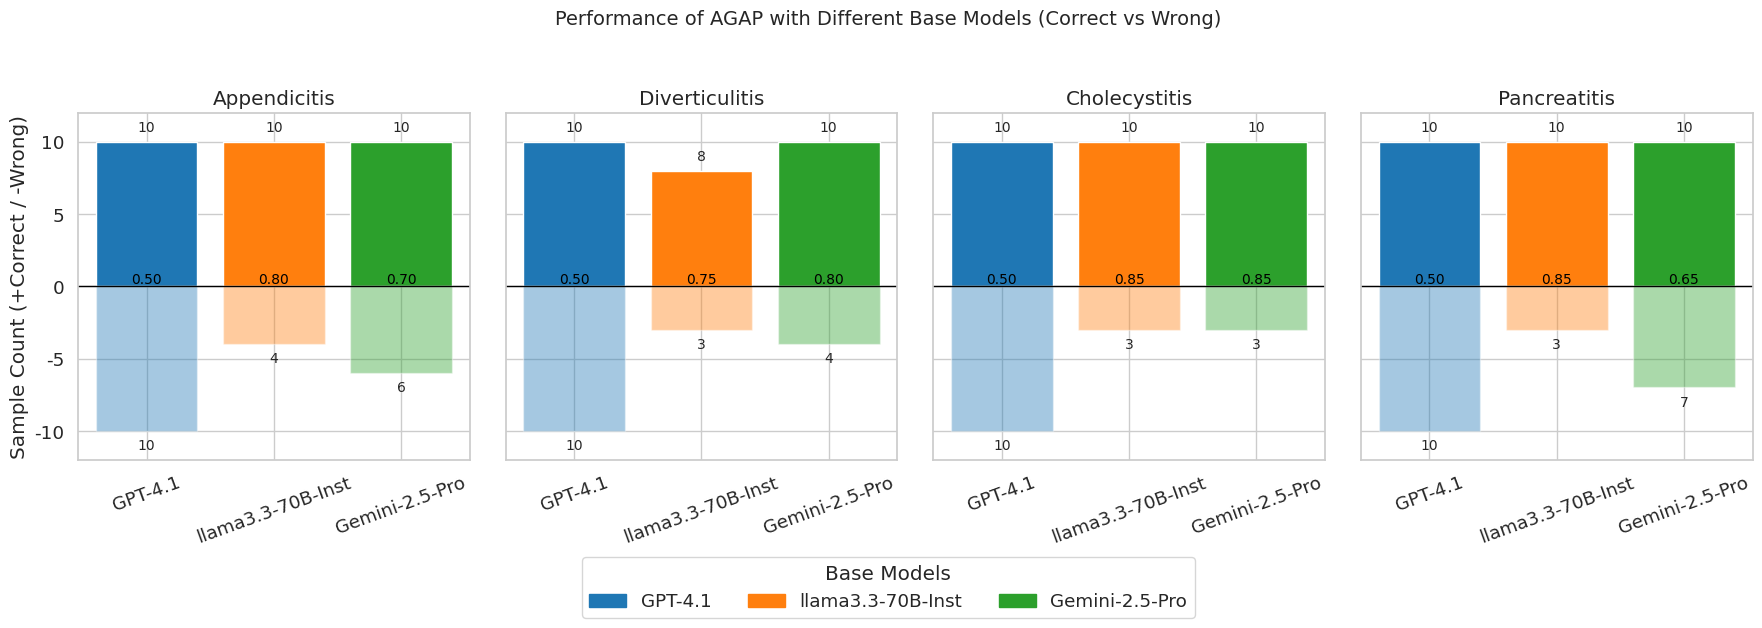

In [210]:
import matplotlib.pyplot as plt
import numpy as np

# 示例数据
data = {
    "Appendicitis": {
        "GPT-4.1": {"correct": 10, "wrong": 10},
        "llama3.3-70B-Inst":  {"correct": 10, "wrong": 4},
        "Gemini-2.5-Pro":  {"correct": 10, "wrong": 6},
    },
    "Diverticulitis": {
        "GPT-4.1": {"correct": 10, "wrong": 10},
        "llama3.3-70B-Inst":  {"correct": 8, "wrong": 3},
        "Gemini-2.5-Pro":  {"correct": 10, "wrong": 4},
    },
    "Cholecystitis": {
        "GPT-4.1": {"correct": 10, "wrong": 10},
        "llama3.3-70B-Inst":  {"correct": 10, "wrong": 3},
        "Gemini-2.5-Pro":  {"correct": 10, "wrong": 3},
    },
    "Pancreatitis": {
        "GPT-4.1": {"correct": 10, "wrong": 10},
        "llama3.3-70B-Inst":  {"correct": 10, "wrong": 3},
        "Gemini-2.5-Pro":  {"correct": 10, "wrong": 7},
    },
}

models = ["GPT-4.1", "llama3.3-70B-Inst", "Gemini-2.5-Pro"]
colors = {
    "GPT-4.1": "#1f77b4",
    "llama3.3-70B-Inst": "#ff7f0e",
    "Gemini-2.5-Pro": "#2ca02c"
}

fig, axs = plt.subplots(1, 4, figsize=(18, 6), sharey=True)

for i, (disease, ax) in enumerate(zip(data.keys(), axs)):
    for j, model in enumerate(models):
        correct = data[disease][model]["correct"]
        wrong = -data[disease][model]["wrong"]
        ax.bar(j, correct, color=colors[model])
        ax.bar(j, wrong, color=colors[model], alpha=0.4)

        # 显示数值
        ax.text(j, correct + 0.5, str(correct), ha='center', va='bottom', fontsize=10)
        ax.text(j, wrong - 0.5, str(abs(wrong)), ha='center', va='top', fontsize=10)

        # 中间显示准确率
        total_correct = correct + (10 - abs(wrong))
        acc = total_correct / 20
        ax.text(j, 0.5, f"{acc:.2f}", ha='center', va='center', fontsize=10, fontweight="normal", color="black")

    ax.axhline(0, color="black", linewidth=1)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=20)
    ax.set_title(disease)
    ax.set_ylim(-12, 12)

# Y轴标签
axs[0].set_ylabel("Sample Count (+Correct / -Wrong)")

# 图例
handles = [plt.Rectangle((0,0),1,1,color=colors[m]) for m in models]
fig.legend(handles, models, title="Base Models", loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

plt.suptitle("Performance of AGAP with Different Base Models (Correct vs Wrong)", fontsize=14)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.savefig(
    '/media/luzhenyang/project/agent_graph_diag/stratification_samples/Performance_of_AGAP_with_Different_Base_Models_(Correct_vs_Wrong).png', 
    dpi=400, bbox_inches='tight')
plt.show()

In [1]:
from statsmodels.stats.proportion import proportion_confint

# 假设你的结果
n_gpt = 40
n_llama = 59
n_gemini = 60
n_total = 80

# method='wilson'
ci_gpt = proportion_confint(n_gpt, n_total, method='wilson')
ci_llama = proportion_confint(n_llama, n_total, method='wilson')
ci_gemini = proportion_confint(n_gemini, n_total, method='wilson')

print(f"GPT-4: {n_gpt/n_total:.1%} (95% CI: {ci_gpt[0]:.1%} - {ci_gpt[1]:.1%})")
print(f"Llama3: {n_llama/n_total:.1%} (95% CI: {ci_llama[0]:.1%} - {ci_llama[1]:.1%})")
print(f"Gemini: {n_gemini/n_total:.1%} (95% CI: {ci_gemini[0]:.1%} - {ci_gemini[1]:.1%})")

GPT-4: 50.0% (95% CI: 39.3% - 60.7%)
Llama3: 73.8% (95% CI: 63.2% - 82.1%)
Gemini: 75.0% (95% CI: 64.5% - 83.2%)


In [3]:
import pandas as pd

gpt_full_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/AGAP_full_dataset_results/statistic_result_full_dataset.xlsx')

In [4]:
gpt_full_df.columns

Index(['Unnamed: 0', 'hadm_id', 'diagnosis', 'tool_called', 'correctness'], dtype='object')

In [5]:
tf_ids = pd.read_csv('/media/luzhenyang/project/agent_graph_diag/stratification_samples/stratification_samples_TF.csv')

gpt_full_df.drop(columns=['Unnamed: 0'], inplace=True)
gpt_tf_df = gpt_full_df[gpt_full_df['hadm_id'].isin(tf_ids['hadm_id'].values)].copy()

In [6]:
llama_tf_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', sheet_name='llama3.3-70B-ins')
gemini_tf_df = pd.read_excel('/media/luzhenyang/project/agent_graph_diag/stratification_samples/statistic_other_base_LLM.xlsx', sheet_name='Gemini-2.5-Pro')

In [12]:
llama_tf_df.columns

Index(['case_index', 'hadm_id', 'diagnosis', 'correctness', 'wrong call'], dtype='object')

--- 1. Descriptive Statistics: Accuracy and 95% Confidence Intervals ---
GPT-4 (ADW): 46.2% (95% CI: 35.7% - 57.1%)
Llama3-70B (ADW): 61.3% (95% CI: 50.3% - 71.2%)
Gemini-2.5-Pro (ADW): 57.5% (95% CI: 46.6% - 67.7%)


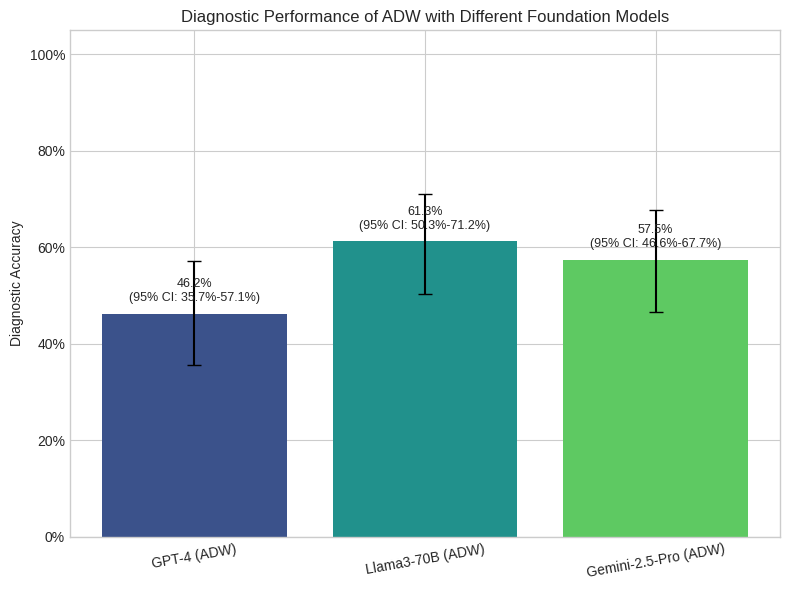


--- 2. Exploratory Analysis: McNemar's Paired Tests ---
Comparison: GPT4 vs. LLAMA3
  - GPT4 correct / LLAMA3 incorrect: 14 cases
  - GPT4 incorrect / LLAMA3 correct: 26 cases
  - McNemar's test p-value: 0.081
  - Conclusion: No statistically significant difference.
------------------------------
Comparison: GPT4 vs. GEMINI
  - GPT4 correct / GEMINI incorrect: 12 cases
  - GPT4 incorrect / GEMINI correct: 21 cases
  - McNemar's test p-value: 0.163
  - Conclusion: No statistically significant difference.
------------------------------
Comparison: LLAMA3 vs. GEMINI
  - LLAMA3 correct / GEMINI incorrect: 19 cases
  - LLAMA3 incorrect / GEMINI correct: 16 cases
  - McNemar's test p-value: 0.736
  - Conclusion: No statistically significant difference.


In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.contingency_tables import mcnemar
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 0: 模拟你的数据 (请用你的真实DataFrame替换) ---
# 我将创建三个模拟的DataFrame来模仿你的真实数据结构。
# 确保你的 'correctness' 列是 1 (正确) 和 0 (错误)。

def create_mock_df(model_name, base_accuracy, n_samples=80):
    ids = [f'patient_{i}' for i in range(n_samples)]
    correctness = [1 if np.random.rand() < base_accuracy - (0.05 * np.random.randn()) else 0 for _ in range(n_samples)]
    df = pd.DataFrame({'hadm_id': ids, 'correctness': correctness})
    # 确保correctness列是整数
    df['correctness'] = df['correctness'].astype(int)
    return df

# 使用你的真实DataFrame替换下面三行
df_gpt4 = create_mock_df('GPT-4', 0.50)
df_llama3 = create_mock_df('Llama3', 0.59)
df_gemini = create_mock_df('Gemini', 0.60)

# 将你的dataframe放入一个字典中，方便循环处理
models_data = {
    'GPT-4 (ADW)': df_gpt4,
    'Llama3-70B (ADW)': df_llama3,
    'Gemini-2.5-Pro (ADW)': df_gemini
}
n_total = len(df_gpt4)

# --- STEP 1: 计算准确率和95%置信区间 ---
print("--- 1. Descriptive Statistics: Accuracy and 95% Confidence Intervals ---")
results = []
for name, df in models_data.items():
    n_correct = df['correctness'].sum()
    accuracy = n_correct / n_total
    ci_low, ci_high = proportion_confint(n_correct, n_total, method='wilson')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        '95% CI Low': ci_low,
        '95% CI High': ci_high
    })
    
    print(f"{name}: {accuracy:.1%} (95% CI: {ci_low:.1%} - {ci_high:.1%})")

df_results = pd.DataFrame(results)

# --- 可视化：条形图 + 误差线 ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(df_results['Model'], df_results['Accuracy'], color=sns.color_palette("viridis", len(df_results)))
yerr = [df_results['Accuracy'] - df_results['95% CI Low'], df_results['95% CI High'] - df_results['Accuracy']]
ax.errorbar(df_results['Model'], df_results['Accuracy'], yerr=yerr, fmt='none', c='black', capsize=5)

ax.set_ylim(0, 1.05)
ax.set_ylabel('Diagnostic Accuracy')
ax.set_title('Diagnostic Performance of ADW with Different Foundation Models')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}')) # 格式化y轴为百分比

# 在条形图上添加数值标签
for i, bar in enumerate(bars):
    yval = bar.get_height()
    ci_low = df_results.loc[i, '95% CI Low']
    ci_high = df_results.loc[i, '95% CI High']
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, 
            f'{yval:.1%}\n(95% CI: {ci_low:.1%}-{ci_high:.1%})', 
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=10, ha='center')
plt.tight_layout()
plt.show()


# --- STEP 2: McNemar's Test for Paired Comparisons ---
print("\n--- 2. Exploratory Analysis: McNemar's Paired Tests ---")

# Merge DFs to easily compare correctness for each hadm_id
df_merged = df_gpt4.rename(columns={'correctness': 'gpt4'})
df_merged = df_merged.merge(df_llama3.rename(columns={'correctness': 'llama3'}), on='hadm_id')
df_merged = df_merged.merge(df_gemini.rename(columns={'correctness': 'gemini'}), on='hadm_id')


def perform_mcnemar(df, model1_col, model2_col):
    """Performs and prints McNemar test results."""
    # Find mismatches
    # b: model1 correct, model2 incorrect
    b = df[(df[model1_col] == 1) & (df[model2_col] == 0)].shape[0]
    # c: model1 incorrect, model2 correct
    c = df[(df[model1_col] == 0) & (df[model2_col] == 1)].shape[0]
    
    # Contingency table for the test
    # The actual values in the concordant cells (a, d) don't matter for the test
    table = [[0, b], [c, 0]]
    
    # Perform the test
    result = mcnemar(table, exact=True)
    
    print(f"Comparison: {model1_col.upper()} vs. {model2_col.upper()}")
    print(f"  - {model1_col.upper()} correct / {model2_col.upper()} incorrect: {b} cases")
    print(f"  - {model1_col.upper()} incorrect / {model2_col.upper()} correct: {c} cases")
    print(f"  - McNemar's test p-value: {result.pvalue:.3f}")
    
    if result.pvalue < 0.05:
        print("  - Conclusion: Statistically significant difference.")
    else:
        print("  - Conclusion: No statistically significant difference.")

# Perform all pairwise comparisons
perform_mcnemar(df_merged, 'gpt4', 'llama3')
print("-" * 30)
perform_mcnemar(df_merged, 'gpt4', 'gemini')
print("-" * 30)
perform_mcnemar(df_merged, 'llama3', 'gemini')